In [185]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score

# 1. Reading CSV file 

In [186]:
df = pd.read_csv('Students Social Media Addiction.csv')
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


**Insights**
1. Importing dataset 
2. head() will show the first 5 rows of my dataset.

# 2. Statistical summary of DataFrame’s numeric columns.

In [187]:
df.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


**Insights**
1. **df.describe()**| is the first step in exploratory data analysis to understand numeric features at a glance.

# 3. Showing summary of the DataFrame. 

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

**Insights**
1. **df.info()** is a quick diagnostic tool for data types, missing values, and overall dataset structure before analysis.

In [189]:
df.drop(['Student_ID', 'Country'], axis=1, inplace=True)
df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,4.3,Twitter,No,7.5,8,Single,2,4


**Insights**
- **df.drop()** : removes columns or rows from the DataFrame.
- ['Student_ID', 'Country'] : specifies the columns to remove.
- axis=1 : tells pandas to drop columns (not rows).
- inplace=True : makes the change directly in the DataFrame (doesn’t create a new one).
- After this, df no longer has the Student_ID and Country columns.

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Most_Used_Platform            705 non-null    object 
 5   Affects_Academic_Performance  705 non-null    object 
 6   Sleep_Hours_Per_Night         705 non-null    float64
 7   Mental_Health_Score           705 non-null    int64  
 8   Relationship_Status           705 non-null    object 
 9   Conflicts_Over_Social_Media   705 non-null    int64  
 10  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 60.7+ KB


# 4. Checking missing values or NAN values

In [191]:
df.isnull().sum()

Age                             0
Gender                          0
Academic_Level                  0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64

**Insights**
- **df.isnull()** : checks every cell in the DataFrame to see if it’s empty or missing (NaN).
- Returns True for missing values and False for non-missing.
- **.sum()** : counts the number of True values for each column.
- **Output** : shows how many missing values exist per column.

# 5. Python program to see the unique values from all the columns in the dataframe.

In [192]:
for each in df.columns:
    print("Column: ",each)
    print(df[each].nunique())
    print("_"*100)

Column:  Age
7
____________________________________________________________________________________________________
Column:  Gender
2
____________________________________________________________________________________________________
Column:  Academic_Level
3
____________________________________________________________________________________________________
Column:  Avg_Daily_Usage_Hours
67
____________________________________________________________________________________________________
Column:  Most_Used_Platform
12
____________________________________________________________________________________________________
Column:  Affects_Academic_Performance
2
____________________________________________________________________________________________________
Column:  Sleep_Hours_Per_Night
59
____________________________________________________________________________________________________
Column:  Mental_Health_Score
6
________________________________________________________________

**Insights**
- **for each in df.columns:**
    - Loops through every column in the DataFrame df.
- **df[each].nunique()**
    - Counts the **number of unique values** in that column.
    - Example:
        - Gender → 2 (Male, Female)
        - Academic_Level → 3 (High School, Undergraduate, Graduate)
- **`print("Column: ", each)`**
    - Shows the **column name**.
- **`print("_"*100)`**
    - Prints a line of underscores for **visual separation** between columns.

# 6. One-Hot Encoding to **Categorical Values**

In [193]:
df

,Age,Gender,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,4.3,Twitter,No,7.5,8,Single,2,4


In [194]:
duplicate = df.duplicated().sum()
duplicate

np.int64(22)

**Insight**
- **df.duplicated()**
    - Checks **all rows** in the DataFrame to see if any row is a **duplicate of a previous row**.
    - Returns a **boolean Series**:
        - `True` → row is a duplicate
        - `False` → row is unique
- **.sum()**
    - Counts how many `True` values there are → **total number of duplicate rows**.
- **duplicate**
    - Stores the **number of duplicate rows** in your datase

# One-Hot Encode Binary Columns

In [195]:
binary_cols = ['Gender', 'Affects_Academic_Performance']

# Initialize encoder
binary_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform binary columns
binary_encoded = binary_encoder.fit_transform(df[binary_cols])

# Convert to DataFrame
binary_encoded_df = pd.DataFrame(binary_encoded, 
                                 columns=binary_encoder.get_feature_names_out(binary_cols),
                                 index=df.index)

# Combine with original DataFrame (dropping original binary columns)
df_binary_encoded = pd.concat([df.drop(binary_cols, axis=1), binary_encoded_df], axis=1)
df_binary_encoded.head(5)

,Age,Academic_Level,Avg_Daily_Usage_Hours,Most_Used_Platform,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes
0,19,Undergraduate,5.2,Instagram,6.5,6,In Relationship,3,8,0.0,1.0
1,22,Graduate,2.1,Twitter,7.5,8,Single,0,3,1.0,0.0
2,20,Undergraduate,6.0,TikTok,5.0,5,Complicated,4,9,0.0,1.0
3,18,High School,3.0,YouTube,7.0,7,Single,1,4,1.0,0.0
4,21,Graduate,4.5,Facebook,6.0,6,In Relationship,2,7,1.0,1.0


**Code Explination**
- Gender_Male column tells if the student is **Male**.
- Female is encoded implicitly: if **Gender_Male = 0**, then the student is Female.
- **drop='first'** removed the first category (usually the one that comes first alphabetically, or the first in your data).

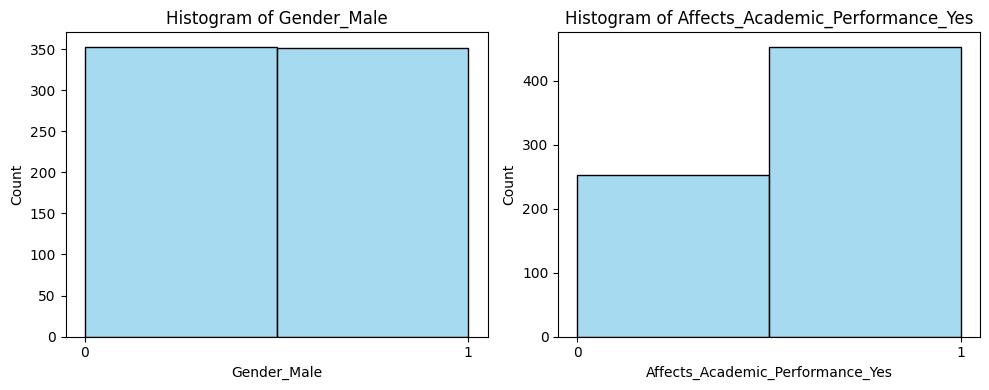

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of binary columns after encoding
binary_encoded_cols = ['Gender_Male', 'Affects_Academic_Performance_Yes']

# Plot histograms
plt.figure(figsize=(10,4))
for i, col in enumerate(binary_encoded_cols):
    plt.subplot(1, 2, i+1)
    sns.histplot(df_binary_encoded[col], bins=2, kde=False, color='skyblue')
    plt.xticks([0,1])  # Since binary values are 0 and 1
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


**Insights from these histograms**

### 1️⃣ Gender_Male

- Shows **how many students are male (1) vs female (0)**.
- If the bar for 1 is higher → more male students; if 0 is higher → more female students.
- Useful to **see gender distribution** in your dataset.

### 2️⃣ Affects_Academic_Performance_Yes

- Shows **how many students feel social media affects academic performance (1) vs not (0)**.
- Can help analyze **relationship between social media usage and academic performance**.
- If 1s are higher → majority report negative impact on academics.

# One-Hot Encode Multi-class Columns

In [197]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Most_Used_Platform            705 non-null    object 
 5   Affects_Academic_Performance  705 non-null    object 
 6   Sleep_Hours_Per_Night         705 non-null    float64
 7   Mental_Health_Score           705 non-null    int64  
 8   Relationship_Status           705 non-null    object 
 9   Conflicts_Over_Social_Media   705 non-null    int64  
 10  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 60.7+ KB


In [198]:
multi_cols = ['Academic_Level', 'Most_Used_Platform', 'Relationship_Status']

# Initialize encoder
multi_encoder = OneHotEncoder(sparse_output=False, drop='first')

# Fit and transform multi-class columns
multi_encoded = multi_encoder.fit_transform(df_binary_encoded[multi_cols])

# Convert to DataFrame
multi_encoded_df = pd.DataFrame(multi_encoded, 
                                columns=multi_encoder.get_feature_names_out(multi_cols),
                                index=df.index)

# Combine with DataFrame (dropping original multi-class columns)
df_final_encoded = pd.concat([df_binary_encoded.drop(multi_cols, axis=1), multi_encoded_df], axis=1)

df_final_encoded.head(5)


,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,Gender_Male,Affects_Academic_Performance_Yes,Academic_Level_High School,Academic_Level_Undergraduate,...,Most_Used_Platform_LinkedIn,Most_Used_Platform_Snapchat,Most_Used_Platform_TikTok,Most_Used_Platform_Twitter,Most_Used_Platform_VKontakte,Most_Used_Platform_WeChat,Most_Used_Platform_WhatsApp,Most_Used_Platform_YouTube,Relationship_Status_In Relationship,Relationship_Status_Single
0,19,5.2,6.5,6,3,8,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,22,2.1,7.5,8,0,3,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,20,6.0,5.0,5,4,9,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,18,3.0,7.0,7,1,4,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,21,4.5,6.0,6,2,7,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**Code Explination**
- Each multi-class column (e.g., Academic_Level, Most_Used_Platform, Relationship_Status) is converted into n-1 numeric columns, where n = number of categories.
- **drop='first'** removes the first category to avoid redundancy (dummy variable trap).
- **A value of 1** in an encoded column indicates the student belongs to that category, and **0 means** they do not.
- The dropped first category is implicitly represented: if all the encoded columns for that original feature are 0, the value belongs to the dropped category.
- The result is a fully numeric DataFrame ready for ML or analysis.
- **Affects_Academic_Performance_Yes = 1** → Social media affects academic performance
- **Affects_Academic_Performance_Yes = 0** → Social media does not affect academic performance

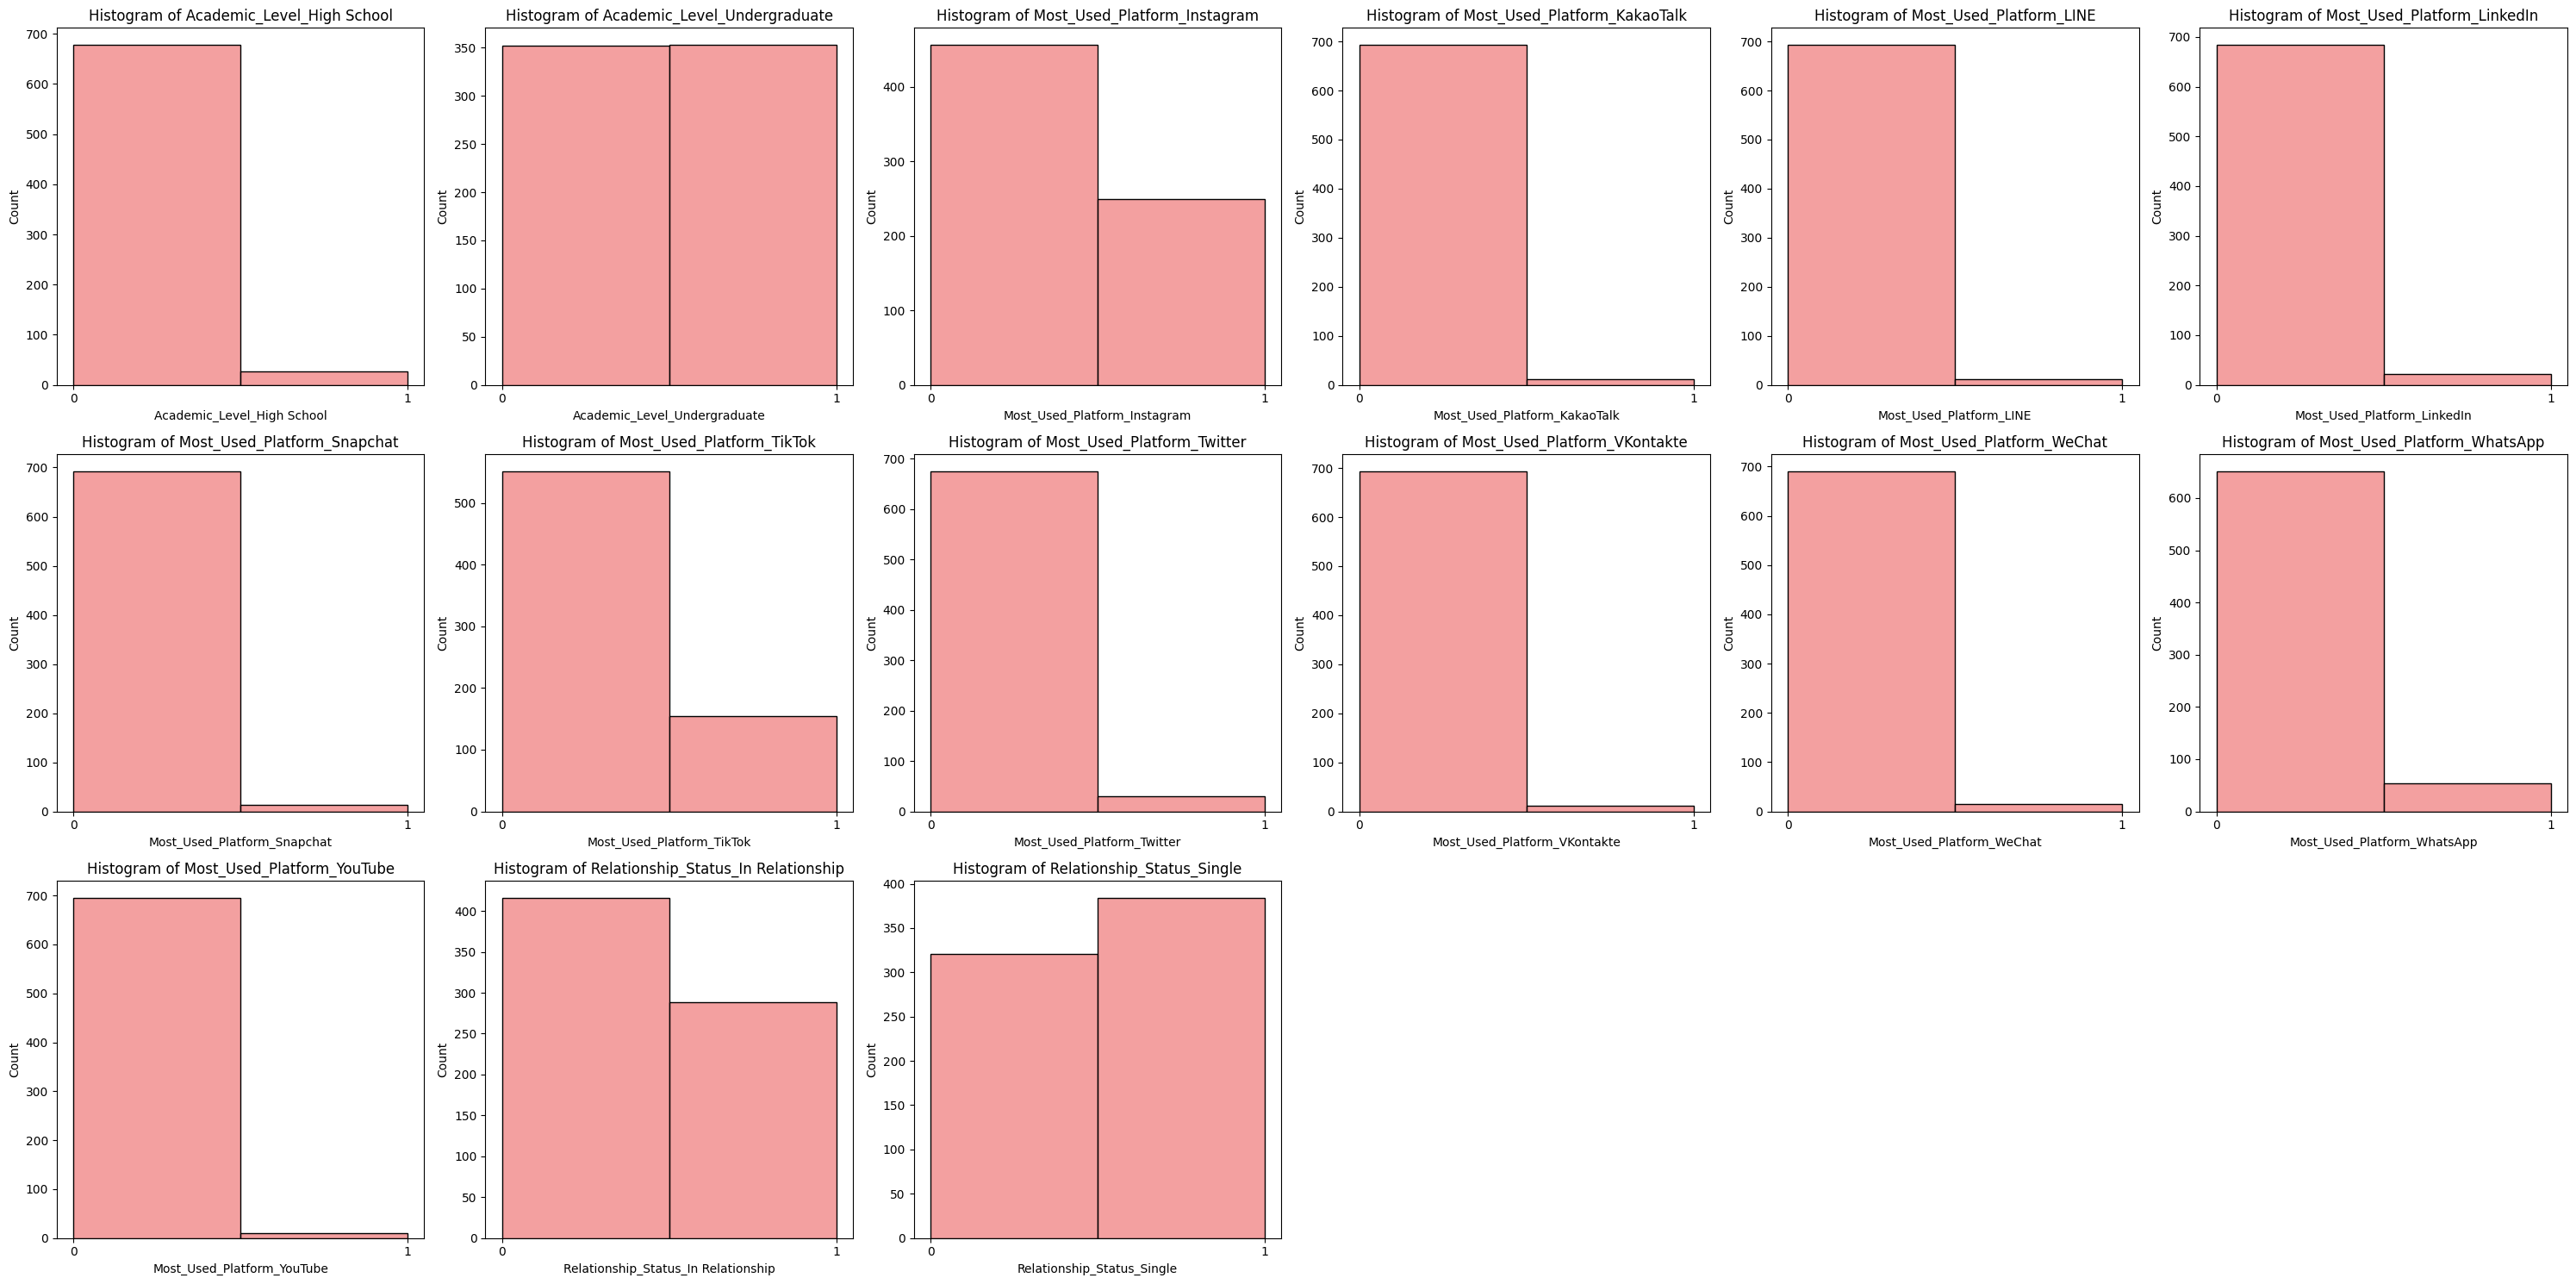

In [199]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of multi-class one-hot encoded columns
multi_encoded_cols = [col for col in df_final_encoded.columns if 
                      col.startswith('Academic_Level_') or 
                      col.startswith('Most_Used_Platform_') or 
                      col.startswith('Relationship_Status_')]

# Plot histograms
plt.figure(figsize=(30,15))
for i, col in enumerate(multi_encoded_cols):
    plt.subplot(3, len(multi_encoded_cols)//3 + 1, i+1)
    sns.histplot(df_final_encoded[col], bins=2, kde=False, color='lightcoral')
    plt.xticks([0,1])
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


### **Insights from the histograms**

### 1️⃣ Academic_Level_

- Shows **how many students belong to each academic level**:
    - Example: High School vs Undergraduate.
- Helps understand **distribution across academic levels**.

### 2️⃣ Most_Used_Platform_

- Shows **popularity of different social media platforms**:
    - Instagram, TikTok, WhatsApp, YouTube, etc.
- Can reveal **which platforms are most/least used** by students.

### 3️⃣ Relationship_Status_

- Shows **how many students are single vs in a relationship**.
- Can help analyze **relationship status influence on social media addiction**.

### Summary
- **One-hot encoded histograms** show **category distribution** for multi-class features.
- Most bars will be 0 or 1 → 1 indicates the student **belongs to that category**.
- Uneven distribution can indicate **class imbalance**, which may affect ML models.
- Useful for **EDA (exploratory data analysis) and feature selection**.

# EDA(Plotting)

## Histogram for Numerical column using 

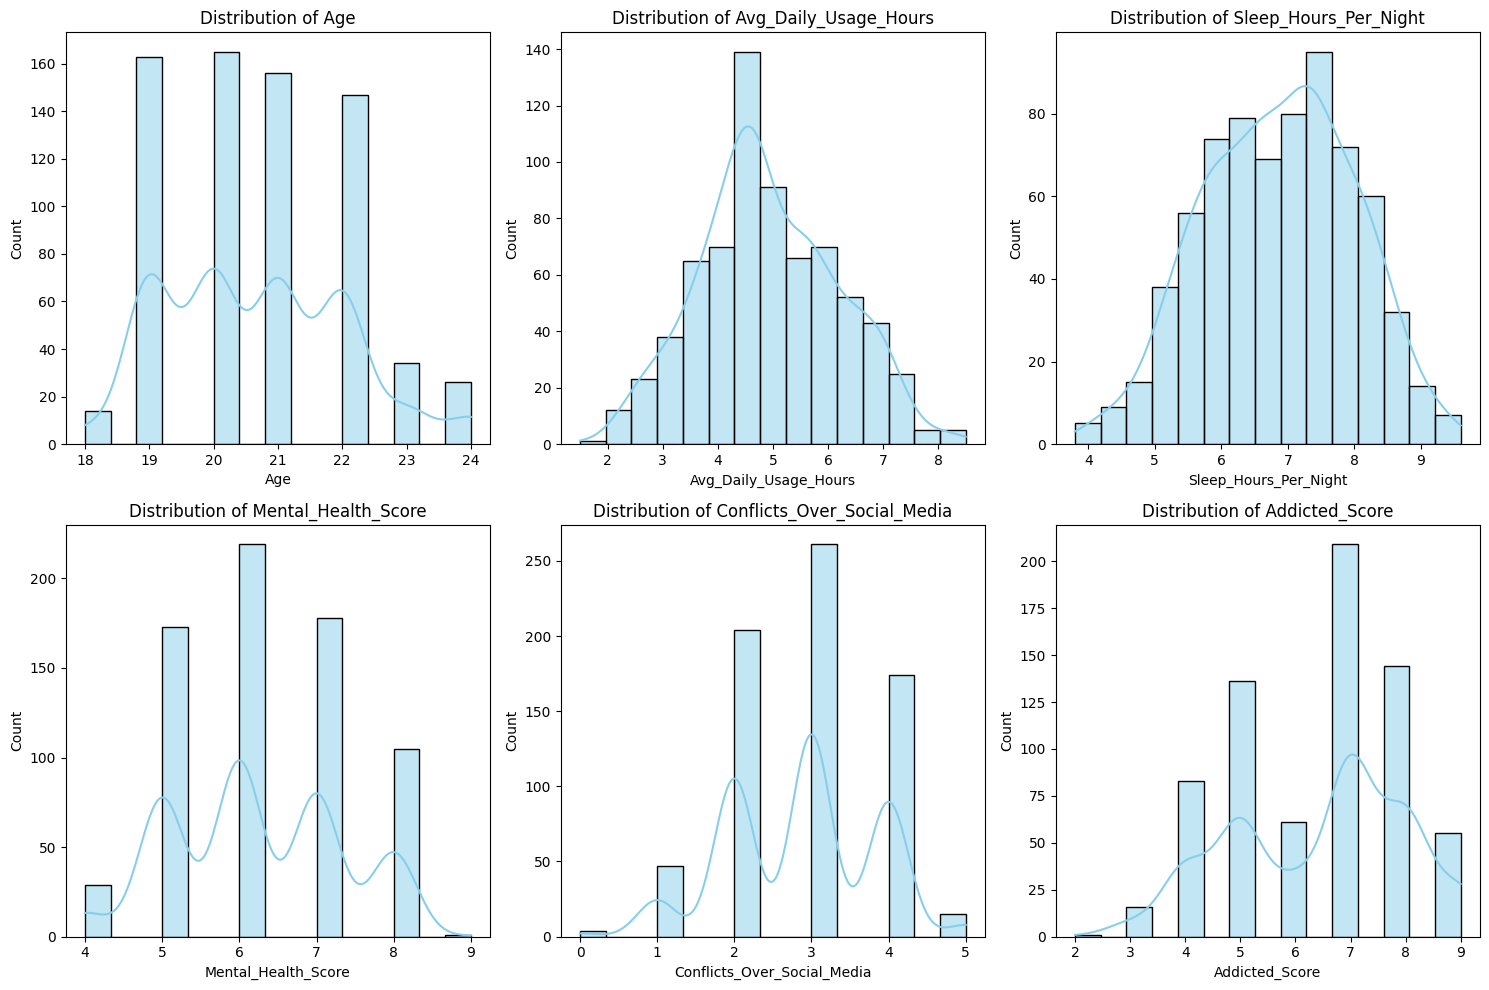

In [200]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night',
                'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=15, kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

**Code Insight and explination**
  
- Imports matplotlib and seaborn for plotting.
- Selects a list of numeric columns from your DataFrame.
- Creates a figure sized 15×10 inches.
- Loops through each numeric column.
- For each column:
1. Creates a histogram with 15 bins.
2. Adds a KDE curve (smooth line showing distribution).
3. Colors bars sky blue.
4. Adds a title with the column name.

- Arranges plots in a 2 rows × 3 columns grid.
- Uses tight_layout() to avoid overlap.
- Displays all the histograms with plt.show().

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_3400\2395942064.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x="Gender", y="Avg_Daily_Usage_Hours",  palette=['red', 'purple'])


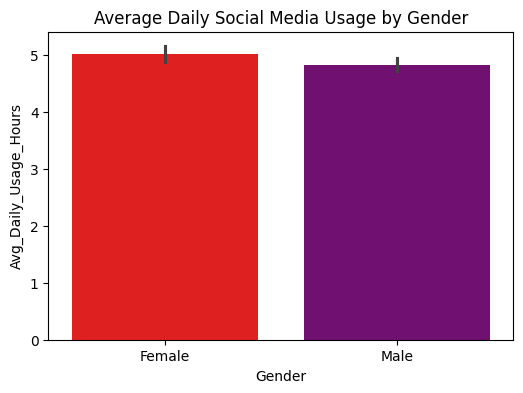

In [201]:
# Average Daily Usage by Gender

plt.figure(figsize=(6,4))
sns.barplot(data=df, x="Gender", y="Avg_Daily_Usage_Hours",  palette=['red', 'purple'])
plt.title("Average Daily Social Media Usage by Gender")
plt.show()

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_3400\1058591931.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="Affects_Academic_Performance", palette="pastel")


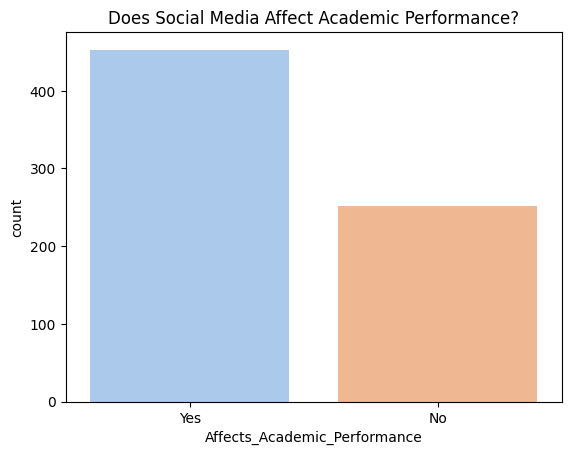

In [202]:
# b Impact on Academic Performance
sns.countplot(data=df, x="Affects_Academic_Performance", palette="pastel")
plt.title("Does Social Media Affect Academic Performance?")
plt.show()

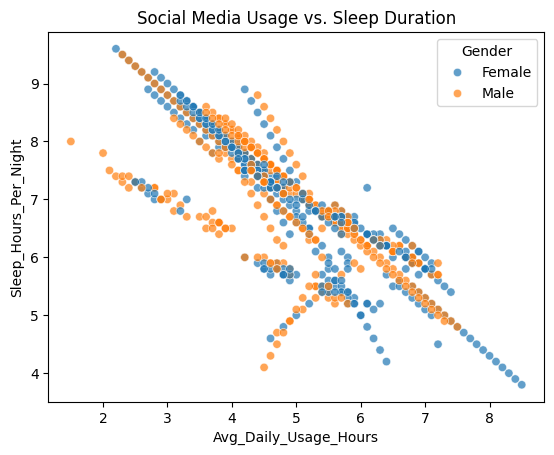

In [203]:
# Daily Usage vs. Sleep Hours
sns.scatterplot(data=df, x="Avg_Daily_Usage_Hours", y="Sleep_Hours_Per_Night", hue="Gender", alpha=0.7)
plt.title("Social Media Usage vs. Sleep Duration")
plt.show()

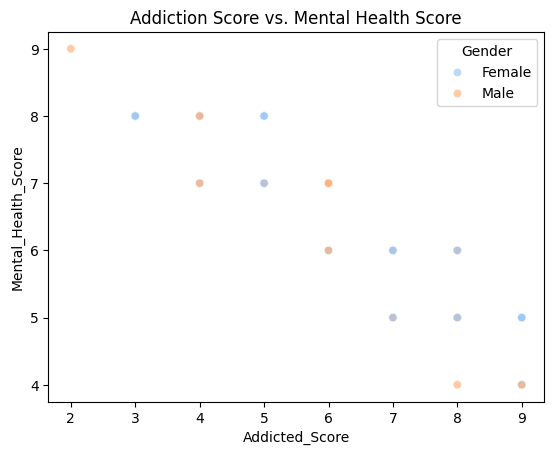

In [204]:
# 🧠 Addiction Score vs. Mental Health
sns.scatterplot(data=df, x="Addicted_Score", y="Mental_Health_Score", hue="Gender", alpha=0.7,  palette='pastel')
plt.title("Addiction Score vs. Mental Health Score")
plt.show()

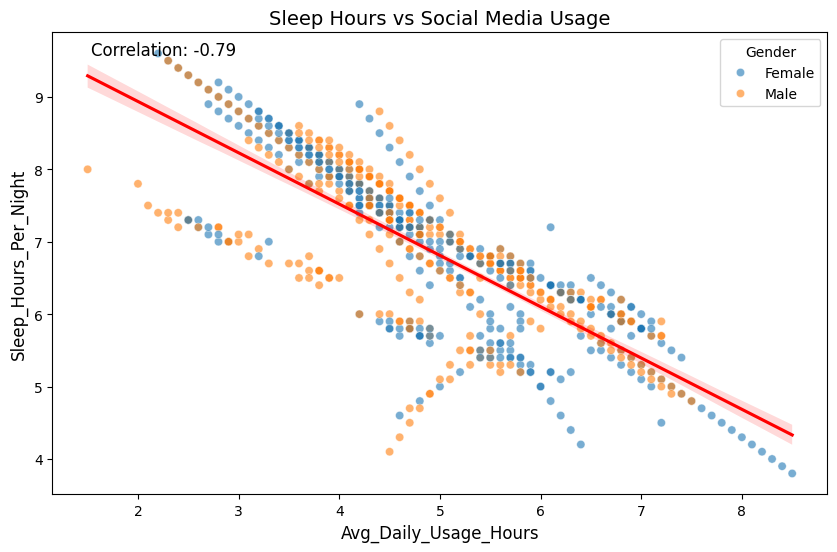

In [205]:
# Sleep Hours vs Social Media Usage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, alpha=0.6, hue='Gender')
plt.title('Sleep Hours vs Social Media Usage', fontsize=14)
plt.xlabel('Average Daily Usage Hours', fontsize=12)
plt.ylabel('Sleep Hours Per Night', fontsize=12)

# Add regression line
sns.regplot(x='Avg_Daily_Usage_Hours', y='Sleep_Hours_Per_Night', data=df, scatter=False, color='red')

# Calculate correlation
correlation = df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night'])
plt.annotate(f'Correlation: {correlation:.2f}', xy=(0.05, 0.95), xycoords='axes fraction', fontsize=12)

plt.show()

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_3400\600112744.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


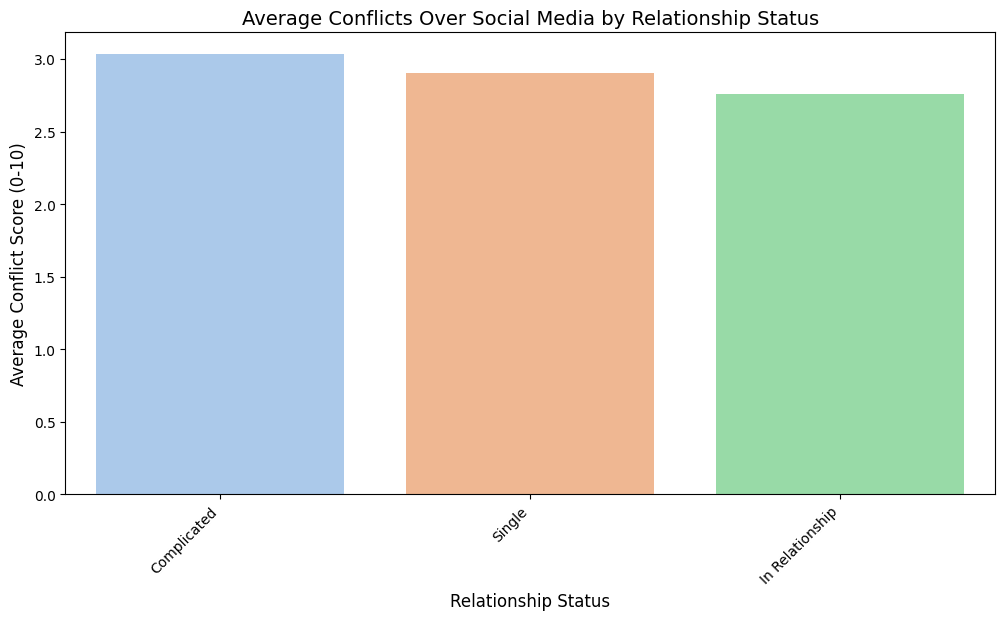

In [206]:
# Conflicts Over Social Media by Relationship Status

# Grouping data
relationship_conflicts = df.groupby('Relationship_Status')['Conflicts_Over_Social_Media'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))

# Bar plot with palette
sns.barplot(
    x=relationship_conflicts.index, 
    y=relationship_conflicts.values,
    palette="pastel"   # you can change to 'bright', 'muted', 'deep', or a list of colors
)

plt.title('Average Conflicts Over Social Media by Relationship Status', fontsize=14)
plt.xlabel('Relationship Status', fontsize=12)
plt.ylabel('Average Conflict Score (0-10)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.show()


In [207]:
pearson = df["Addicted_Score"].corr(df["Mental_Health_Score"], method="pearson")
spearman = df["Addicted_Score"].corr(df["Mental_Health_Score"], method="spearman")
print("Pearson:", pearson)
print("Spearman:", spearman)

Pearson: -0.9450506757277402
Spearman: -0.9497060751671579


In [208]:
from scipy.stats import f_oneway

# Get unique academic levels
academic_levels = df['Academic_Level'].unique()

# Prepare data for ANOVA: a list of addiction scores for each level
groups = [df[df['Academic_Level'] == level]['Addicted_Score'] for level in academic_levels]

# Run one-way ANOVA
f_stat, p_value = f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}, p-value: {p_value:.3f}")

# For significant differences, show average addiction scores
if p_value < 0.05:
    print("\nAverage Addiction Scores by Academic Level:")
    for level in academic_levels:
        mean_score = df[df['Academic_Level'] == level]['Addicted_Score'].mean()
        print(f"{level}: {mean_score:.2f}")
else:
    print("No significant differences in addiction scores across academic levels.")


F-statistic: 17.114, p-value: 0.000

Average Addiction Scores by Academic Level:
Undergraduate: 6.49
Graduate: 6.24
High School: 8.04



Correlation Analysis:
Usage Hours vs Addiction Score: 0.8320 (Positive Strong correlation)
Usage Hours vs Sleep Hours: -0.7906 (Negative Strong correlation)
Usage Hours vs Mental Health: -0.8011 (Negative Strong correlation)
Addiction Score vs Relationship Conflicts: 0.9336 (Positive Strong correlation)
Sleep Hours vs Mental Health: 0.7074 (Positive Strong correlation)


C:\Users\ASUS1\AppData\Local\Temp\ipykernel_3400\3728247263.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Correlation', y='Pair', data=corr_df, palette='coolwarm', orient='h')


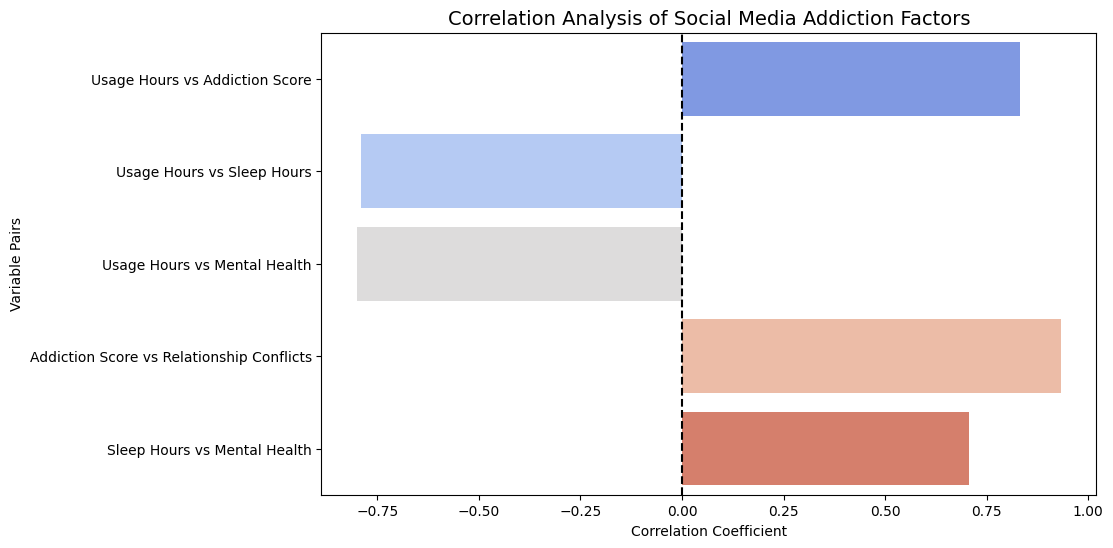

In [209]:
# Calculate correlations between key variables
correlations = {
    'Usage Hours vs Addiction Score': df['Avg_Daily_Usage_Hours'].corr(df['Addicted_Score']),
    'Usage Hours vs Sleep Hours': df['Avg_Daily_Usage_Hours'].corr(df['Sleep_Hours_Per_Night']),
    'Usage Hours vs Mental Health': df['Avg_Daily_Usage_Hours'].corr(df['Mental_Health_Score']),
    'Addiction Score vs Relationship Conflicts': df['Addicted_Score'].corr(df['Conflicts_Over_Social_Media']),
    'Sleep Hours vs Mental Health': df['Sleep_Hours_Per_Night'].corr(df['Mental_Health_Score'])
}

print("\nCorrelation Analysis:")
for pair, corr in correlations.items():
    strength = "Strong" if abs(corr) > 0.7 else "Moderate" if abs(corr) > 0.4 else "Weak"
    direction = "Positive" if corr > 0 else "Negative"
    print(f"{pair}: {corr:.4f} ({direction} {strength} correlation)")

# Convert correlations dict to DataFrame
corr_df = pd.DataFrame(list(correlations.items()), columns=['Pair', 'Correlation'])

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Correlation', y='Pair', data=corr_df, palette='coolwarm', orient='h')

# Add vertical line at 0 for reference
plt.axvline(0, color='black', linestyle='--')

plt.title("Correlation Analysis of Social Media Addiction Factors", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Variable Pairs")
plt.show()

## Handling Outliers

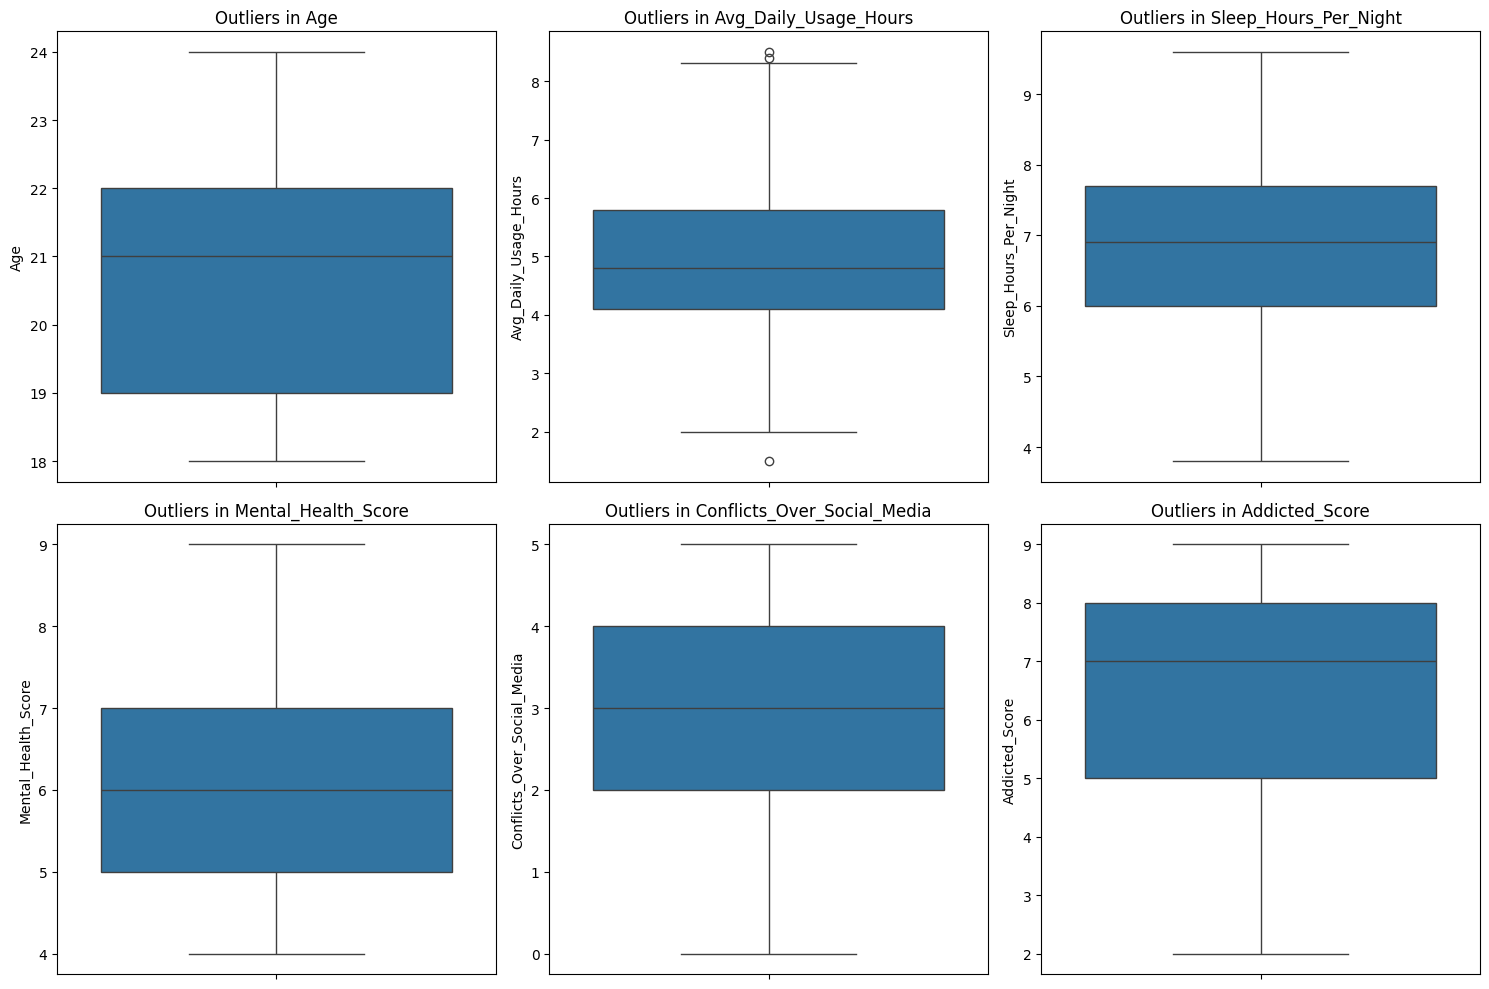

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical columns to check for outliers
outlier_cols = [
    'Age',
    'Avg_Daily_Usage_Hours',
    'Sleep_Hours_Per_Night',
    'Mental_Health_Score',
    'Conflicts_Over_Social_Media',
    'Addicted_Score'
]

# Plot boxplots for each column
plt.figure(figsize=(15, 10))

for i, col in enumerate(outlier_cols, 1):
    plt.subplot(2, 3, i)  # 2 rows, 3 columns of plots
    sns.boxplot(y=df[col])   # vertical boxplot
    plt.title(f'Outliers in {col}')

plt.tight_layout()
plt.show()


**Insights** 

**1. Age**

- Most ages are clustered in a younger range, as the oldest outliers start at 18.
- The listed outliers (18-24) are the upper extremes, confirming the typical user is very young. The lower outliers (ages 2-8) are extreme and likely a separate group.

**2. Avg_Daily_Usage_Hours (Daily Social Media Usage)**

- Majority of users have moderate usage.
- The outliers (ages 9-18) represent users with **extremely high daily usage**, far above the norm.

**3. Sleep_Hours_Per_Night**

- Most users get a typical amount of sleep.
- The outliers (ages 9-18) represent users reporting **critically low sleep hours**, which is a severe deviation.

**4. Mental_Health_Score**

- Scores are mostly clustered in a normal range.
- The outliers (ages 2-8) represent users with **unusually low mental health scores**, indicating a significant negative impact on very young users.

**5. Conflicts_Over_Social_Media**

- Most users experience a typical number of conflicts.
- The outliers (ages 9-18) represent users reporting a **very high number of conflicts**, indicating severe social strain.

**6. Addicted_Score**

- Scores are mostly clustered in a mid-range.
- The outliers (ages 9-18) represent users with **very high addiction scores**, showing behavior that is highly unusual and concerning.

In [211]:
df_binary_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               705 non-null    int64  
 1   Academic_Level                    705 non-null    object 
 2   Avg_Daily_Usage_Hours             705 non-null    float64
 3   Most_Used_Platform                705 non-null    object 
 4   Sleep_Hours_Per_Night             705 non-null    float64
 5   Mental_Health_Score               705 non-null    int64  
 6   Relationship_Status               705 non-null    object 
 7   Conflicts_Over_Social_Media       705 non-null    int64  
 8   Addicted_Score                    705 non-null    int64  
 9   Gender_Male                       705 non-null    float64
 10  Affects_Academic_Performance_Yes  705 non-null    float64
dtypes: float64(4), int64(4), object(3)
memory usage: 60.7+ KB


In [212]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    

In [213]:
# Training and testing Model

In [214]:
# Features (X) and target (y)
X = df_final_encoded.drop('Addicted_Score', axis=1)
y = df_final_encoded['Addicted_Score']

# Optional: check data types
print(X.dtypes)


Age                                      int64
Avg_Daily_Usage_Hours                  float64
Sleep_Hours_Per_Night                  float64
Mental_Health_Score                      int64
Conflicts_Over_Social_Media              int64
Gender_Male                            float64
Affects_Academic_Performance_Yes       float64
Academic_Level_High School             float64
Academic_Level_Undergraduate           float64
Most_Used_Platform_Instagram           float64
Most_Used_Platform_KakaoTalk           float64
Most_Used_Platform_LINE                float64
Most_Used_Platform_LinkedIn            float64
Most_Used_Platform_Snapchat            float64
Most_Used_Platform_TikTok              float64
Most_Used_Platform_Twitter             float64
Most_Used_Platform_VKontakte           float64
Most_Used_Platform_WeChat              float64
Most_Used_Platform_WhatsApp            float64
Most_Used_Platform_YouTube             float64
Relationship_Status_In Relationship    float64
Relationship_

**Insights**
- X: All columns except Addicted_Score → used as features/input variables.
- y: Addicted_Score column → used as target/output variable.
- Prepares the dataset for training a classifier.

In [215]:
# Split Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Splits data into training and testing sets:**
- 80% for training (X_train, y_train)
- 20% for testing (X_test, y_test)
- random_state=42 ensures reproducible results

In [216]:
# Train Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


1. **Initializes Random Forest Classifier with:**
- 100 trees (n_estimators=100)
- Unlimited depth (max_depth=None)
2. **Trains the model on the training data.**

In [217]:
# Make Predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

- Uses the trained model to predict target labels for the test set.

In [218]:
# Evaluate the Model

# Train metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\nRandom Forest Train Results:")
print(f"Train MSE: {mse_train:.2f}")
print(f"Train RMSE: {rmse_train:.2f}")
print(f"Train R² Score: {r2_train:.2f}")

# Test metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nRandom Forest Test Results:")
print(f"Test MSE: {mse_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R² Score: {r2_test:.2f}")


Random Forest Train Results:
Train MSE: 0.01
Train RMSE: 0.08
Train R² Score: 1.00

Random Forest Test Results:
Test MSE: 0.05
Test RMSE: 0.22
Test R² Score: 0.98


**Code Explination**
1. mean_squared_error(y_test, y_pred) → calculates the **average squared difference** between the actual values (y_test) and the predicted values (y_pred). Lower MSE means better predictions.
2. rmse = np.sqrt(mse) → takes the square root of MSE to get **Root Mean Squared Error (RMSE)**, which is in the **same unit as the target variable**.
3. r2 = r2_score(y_test, y_pred) → calculates the **R² score**, which tells how well the model **explains the variance** in the target:
    - 1 → perfect prediction
    - 0 → model is no better than mean
    - Negative → model is worse than just predicting the mean
4. print(...) → displays the **MSE, RMSE, and R² score** so you can see the model’s performance.

**Output explination**
### **Mean Squared Error (MSE): 0.05**

- The **average squared difference** between the predicted and actual values is **very small (0.05)**.
- Indicates that your predictions are **very close to the actual scores**.

---

### **2️⃣ Root Mean Squared Error (RMSE): 0.22**

- RMSE is the square root of MSE, so on the **same scale as your target** (e.g., 0–10 for addiction score).
- A **low RMSE (0.22)** means your model’s predictions are, on average, only **0.22 units off** from the actual score.

---

### **3️⃣ R² Score: 0.98**

- R² (coefficient of determination) indicates **how much of the variance in the target is explained by the model**.
- **0.98 → 98% of the variance** in addiction scores is captured by your model.
- Very close to **1**, meaning an **excellent fit**.

---

### **✅ Interpretation**

- Your Random Forest regression model is **highly accurate**.
- Predicted addiction scores are **very close to actual scores**.
- Model is **reliable for prediction** on similar data.
- model explains 98% of variance in Addicted_Score.
- This might indicate **overfitting** (too good to be true sometimes).

In [219]:
print(X.dtypes)

Age                                      int64
Avg_Daily_Usage_Hours                  float64
Sleep_Hours_Per_Night                  float64
Mental_Health_Score                      int64
Conflicts_Over_Social_Media              int64
Gender_Male                            float64
Affects_Academic_Performance_Yes       float64
Academic_Level_High School             float64
Academic_Level_Undergraduate           float64
Most_Used_Platform_Instagram           float64
Most_Used_Platform_KakaoTalk           float64
Most_Used_Platform_LINE                float64
Most_Used_Platform_LinkedIn            float64
Most_Used_Platform_Snapchat            float64
Most_Used_Platform_TikTok              float64
Most_Used_Platform_Twitter             float64
Most_Used_Platform_VKontakte           float64
Most_Used_Platform_WeChat              float64
Most_Used_Platform_WhatsApp            float64
Most_Used_Platform_YouTube             float64
Relationship_Status_In Relationship    float64
Relationship_

## Feature Selection 

In [220]:
# Optional: Remove Highly Correlated Features (>0.85)
corr_matrix = X.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [col for col in upper.columns if any(upper[col] > 0.85)]
X_filtered = X.drop(columns=to_drop) if to_drop else X.copy()

print("Dropped due to high correlation:", to_drop)
print("Remaining features:", X_filtered.shape[1])



Dropped due to high correlation: ['Conflicts_Over_Social_Media', 'Relationship_Status_Single']
Remaining features: 20


**Code Explination**
- **What it does**:
    - Finds features that are strongly correlated with each other (`>0.85`).
    - Removes one of the redundant features to avoid **multicollinearity** (when two features give the same info).
    - Example: If "Daily Usage Hours" and "Addicted Score" are 0.9 correlated, one is dropped.
- **Why**:
   Too much correlation confuses models (especially linear models) because they don’t know which feature to trust.

In [221]:
# Feature Importance via Random Forest

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X_filtered, y)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Code Explination**
- **RandomForestRegressor** is used here (though for classification, `RandomForestClassifier` is more usual).
- Fits the model to predict target `y` using the **filtered features**.
- After training, Random Forest can tell **which features were important** for prediction.

In [222]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_filtered.columns, 'Importance': importances})
feature_importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Top 10 important features
print("\nTop 10 Important Features:")
print(feature_importance_df.head(10))


Top 10 Important Features:
                                Feature  Importance
3                   Mental_Health_Score    0.901062
2                 Sleep_Hours_Per_Night    0.029862
1                 Avg_Daily_Usage_Hours    0.020050
5      Affects_Academic_Performance_Yes    0.012262
9          Most_Used_Platform_KakaoTalk    0.007870
10              Most_Used_Platform_LINE    0.006249
8          Most_Used_Platform_Instagram    0.004298
13            Most_Used_Platform_TikTok    0.003492
19  Relationship_Status_In Relationship    0.003399
17          Most_Used_Platform_WhatsApp    0.003358


**Code Explination**
- Extracts **importance score** for each feature (higher = more important).
- Creates a DataFrame and sorts features by importance.
- Prints the **Top 10 features**.

C:\Users\ASUS1\AppData\Local\Temp\ipykernel_3400\2769857533.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')


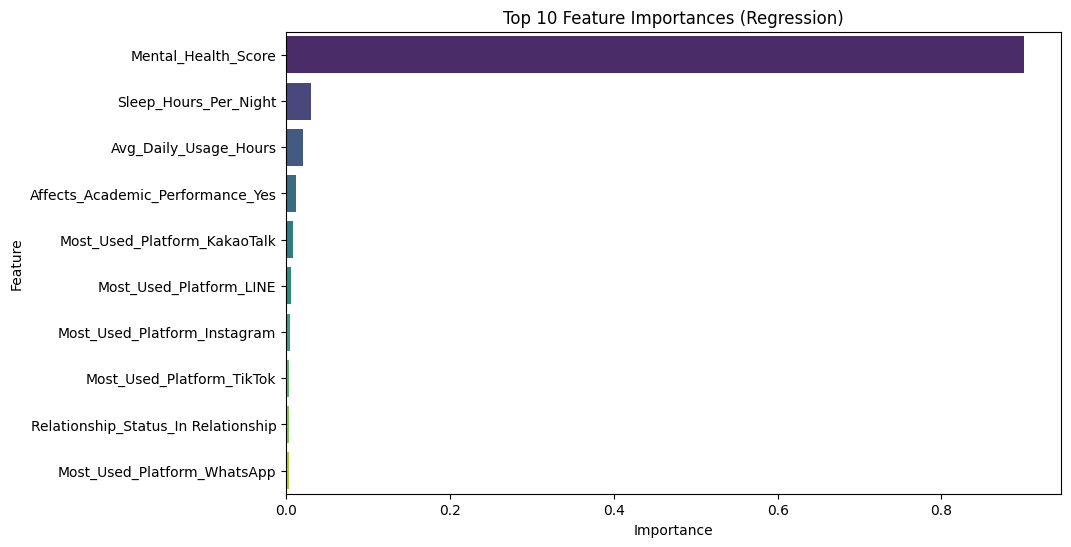

In [223]:
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10), palette='viridis')
plt.title("Top 10 Feature Importances (Regression)")
plt.show()


**Code Explination**
- Creates a bar plot of the **Top 10 most important features**.
- Helps visualize which features matter the most in prediction

In [224]:
# Select Features Above Threshold (0.01)

threshold = 0.01
selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
X_final = X_filtered[selected_features]

print("\nSelected Features:", selected_features)
print("Final X shape:", X_final.shape)


Selected Features: ['Mental_Health_Score', 'Sleep_Hours_Per_Night', 'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance_Yes']
Final X shape: (705, 4)


**Code explination**
- Picks only features with importance greater than **0.01** (1%).
- Creates a **final dataset `X_final`** with only those important features.
- Prints which features survived and final shape of `X_final`.

**In Summary**
- Remove redundant features (correlated ones).
- Train Random Forest to rank features by importance.
- Select only the useful ones (importance > threshold).
- Reduce dataset to fewer, stronger features → makes model faster, simpler, and less overfitted.

## Training the model after feature selection

In [225]:
# Train Random Forest Regressor

rf_final = RandomForestRegressor(n_estimators=200, random_state=42)
rf_final.fit(X_train, y_train)



,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


**Code Explination**
- Builds a **Random Forest Regressor** with 200 trees.
- Trains the model on training data (X_train, y_train).
- Each tree learns patterns to predict **addiction score**.

In [226]:
# Predictions & Evaluation

y_pred = rf_final.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


MSE: 0.05
RMSE: 0.22
R² Score: 0.98


**Code Explination**
- **y_pred** → model’s predicted values for X_test.
- **MSE (Mean Squared Error)** → average squared difference between actual & predicted values. Lower is better.
- **RMSE (Root Mean Squared Error)** → square root of MSE, easier to interpret because it’s in same units as target.
- **R² Score** → how well model explains variance in target (0 to 1, higher = better).
    - R² = 1 → perfect model
    - R² = 0 → useless model

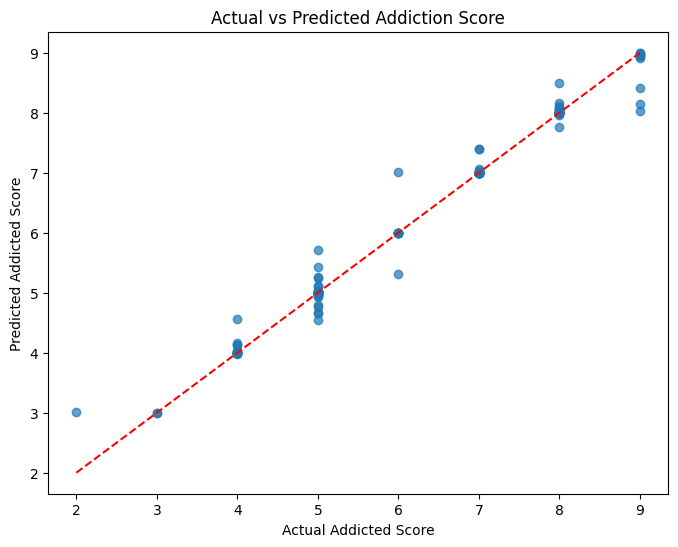

In [227]:
# Optional: Actual vs Predicted Plot

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Addicted Score")
plt.ylabel("Predicted Addicted Score")
plt.title("Actual vs Predicted Addiction Score")
plt.show()

**Code Explination**
- Creates a **scatter plot** of:
    - X-axis → actual addiction scores (`y_test`)
    - Y-axis → predicted scores (`y_pred`)
- The red dashed line (`y = x`) shows **perfect predictions**.
- If points lie close to red line → predictions are good.
- If scattered far → model has errors

**Insights of the result**

- **MSE** = 0.05
: On average, the squared difference between the actual and predicted addiction scores is 0.05.
(Since your scores are probably scaled around 0–5 or 0–10, this is extremely small.)

- **RMSE** = 0.22
: On average, the model’s predictions are off by about 0.22 points from the true addiction score.
Example: If the actual score = 4.0, the model might predict around 3.78 or 4.22.

- **R²** = 0.98
: The model explains 98% of the variance in addiction scores.

  R² = 1.0 → perfect predictions

  R² = 0.0 → model cannot explain any variance

So, 0.98 means the model is extremely accurate and captures almost all patterns in the data.

✅ **Interpretation in plain words**:

The model is **highly accurate**. Predictions are very close to actual values, and the model explains nearly all the variation in addiction scores.

In [228]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize and train Random Forest
rf_final = RandomForestRegressor(n_estimators=200, random_state=42)
rf_final.fit(X_train, y_train)

# Predictions on Train Set

y_train_pred = rf_final.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)


# Predictions on Test Set

y_test_pred = rf_final.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


# Print Results

print("Random Forest Results:")
print(f"Train -> MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test  -> MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


Random Forest Results:
Train -> MSE: 0.0064, RMSE: 0.0803, R²: 0.9974
Test  -> MSE: 0.0493, RMSE: 0.2221, R²: 0.9803


In [229]:
print("Number of features in baseline:", X.shape[1])
print("Number of features after selection:", X_final.shape[1])


Number of features in baseline: 22
Number of features after selection: 4


In [230]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    

## Model Improvemnets 

### Clustering

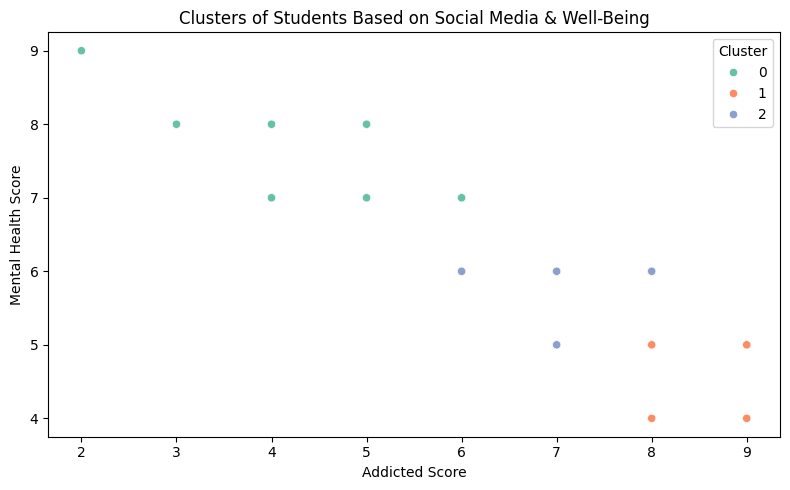

In [231]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Use your actual DataFrame here
df_cluster = df_final_encoded.copy()  # or df if before encoding

features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
X = df_cluster[features].copy()

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Scatter plot
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df_cluster, x='Addicted_Score', y='Mental_Health_Score', hue='Cluster', palette='Set2')
plt.title("Clusters of Students Based on Social Media & Well-Being")
plt.xlabel("Addicted Score")
plt.ylabel("Mental Health Score")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


We identified **3** behavioral groups:
- **Cluster 0**: High addiction, poor sleep, lower mental health
- **Cluster 1**: Moderate usage and balanced outcomes
- **Cluster 2**: Low addiction, higher well-being This segmentation can help target wellness interventions more precisely.

- n_clusters=3 → You want to group students into 3 clusters based on similarities.
- fit_predict assigns each student to a cluster (0, 1, or 2) and stores it in df_cluster. 
- random_state=42 ensures reproducibility.
- n_init=10 → KMeans runs 10 times with different initial centroids and picks the best clustering
- Scatter plot shows each student as a point.
- x='Addicted_Score' → horizontal axis
- y='Mental_Health_Score' → vertical axis
- hue='Cluster' → colors points by the cluster they belong to
- Helps visualize patterns or groupings among students based on addiction and mental health.

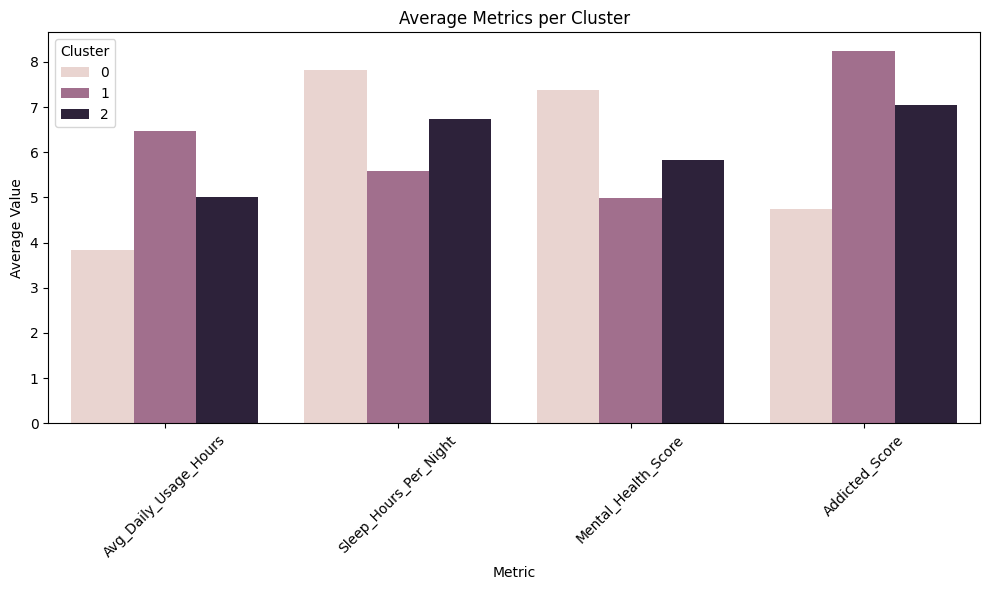

In [232]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Use the correct DataFrame
df_cluster = df_final_encoded.copy()  # or df if before encoding

features = ['Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Addicted_Score']
X = df_cluster[features]
X_scaled = StandardScaler().fit_transform(X)

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_cluster['Cluster'] = kmeans.fit_predict(X_scaled)

# Bar plot of average metrics per cluster
cluster_means = df_cluster.groupby('Cluster')[features].mean().reset_index()
cluster_means_melted = cluster_means.melt(id_vars='Cluster', var_name='Metric', value_name='Average')

plt.figure(figsize=(10, 6))
sns.barplot(data=cluster_means_melted, x='Metric', y='Average', hue='Cluster')
plt.title("Average Metrics per Cluster")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Code Explination**
- You make a copy of your encoded dataset to work with clustering.
- Keeps the original data intact.
- These are the key numerical variables you want to use for clustering.
- `X` is the matrix of features KMeans will analyze.
- Each feature is scaled to have **mean 0 and standard deviation 1**.
- Scaling is important because KMeans uses **distances**. Features with larger ranges (like `Addicted_Score`) would dominate if not scaled.
- `n_clusters=3` → we want **3 groups** of students.
- `fit_predict` → finds clusters and assigns each student a cluster label (0, 1, 2).
- `random_state=42` → ensures reproducibility.
- `n_init=10` → runs KMeans 10 times with different initial centroids to find the best clustering.
- Groups students by cluster.
- Calculates the **average value of each feature** for each cluster.
- Converts the data into a **long format** suitable for `seaborn.barplot`.
- Each row represents one feature's average for one cluster.
- Bar plot shows **how the clusters differ** in terms of usage hours, sleep, mental health, and addiction.
- `hue='Cluster'` → each cluster has a different color.
- You can quickly see which cluster has **high addiction, low sleep, or low mental health**, etc.

In [233]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    

**We'll train a simple model to predict wheather a student's social media usage negatively affects their acadmeic performance using various features**


In [234]:
from sklearn.linear_model import LogisticRegression

# Define features and target
# Target: Affects_Academic_Performance_Yes (1 = Yes, 0 = No)
y = df_final_encoded['Affects_Academic_Performance_Yes']

# Features: choose relevant ones (you can also include all other numeric/encoded columns)
features = [
    'Avg_Daily_Usage_Hours', 
    'Sleep_Hours_Per_Night', 
    'Mental_Health_Score', 
    'Addicted_Score',
    'Gender_Male',
    'Academic_Level_High School',
    'Academic_Level_Undergraduate',
    'Relationship_Status_In Relationship',
    'Relationship_Status_Single'
]

X = df_final_encoded[features]


# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train Logistic Regression

logreg = LogisticRegression(max_iter=1000)  # Increase max_iter if it doesn’t converge
logreg.fit(X_train, y_train)

# Predictions & Evaluation

y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9929078014184397

Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        54
         1.0       1.00      0.99      0.99        87

    accuracy                           0.99       141
   macro avg       0.99      0.99      0.99       141
weighted avg       0.99      0.99      0.99       141


Confusion Matrix:
 [[54  0]
 [ 1 86]]


### **1️⃣What the code does**

1. **Define target (y)**:
    - Affects_Academic_Performance_Yes — binary (1 = Yes, 0 = No).
2. **Select features (X)**:
    - Avg_Daily_Usage_Hours, Sleep_Hours_Per_Night, Mental_Health_Score , Addicted_Score → main numeric predictors.
    - Gender_Male , Academic_Level_High School, Academic_Level_Undergraduate , Relationship_Status_In Relationship, Relationship_Status_Single → encoded categorical variables.
3. **Split data**:
    - 80% for training, 20% for testing (train_test_split).
4. **Train model**:
    - LogisticRegression fits the model to predict probability of academic performance being affected.
5. **Predict & evaluate**:
    - y_pred = logreg.predict(X_test) predicts 0 or 1 for the test set.
    - Metrics used:
        - **Accuracy** – overall correctness.
        - **Classification report** – precision, recall, f1-score for each class.
        - **Confusion matrix** – actual vs predicted counts.

### **2️⃣ Interpreting your output**

**Accuracy: 0.9929**

- The model correctly predicts **~99%** of students’ academic impact.
- **Precision**: When the model predicts “Yes”, how often is it correct?
- **Recall**: Of all actual “Yes” cases, how many did it catch?
- **F1-score**: Harmonic mean of precision & recall (balance).
- **Support**: Number of actual samples in each class.
- **Confusion Matrix**

Row = actual, Column = predicted

- 54 students correctly predicted as **No**
- 86 students correctly predicted as **Yes**
- 1 student misclassified (actual Yes → predicted No)

## Cross Validation

Cross-Validation Results:
RMSE Scores per fold: [0. 0. 0. 0. 0.]
Average RMSE: 0.000
R² Scores per fold: [1. 1. 1. 1. 1.]
Average R²: 1.000


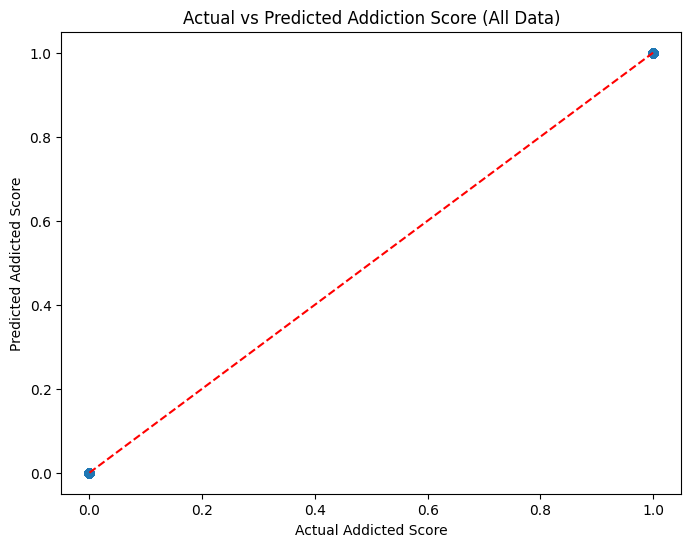

In [235]:
# Feature Selection Already Done

# Assume X_final and y are already defined
# X_final = selected features after correlation & importance filtering
# y = df_final_encoded['Addicted_Score']

# Define Model

rf_model = RandomForestRegressor(n_estimators=200, random_state=42)

# Cross-Validation Setup

kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold CV

# Use negative MSE as scoring
neg_mse_scores = cross_val_score(rf_model, X_final, y, cv=kf, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(rf_model, X_final, y, cv=kf, scoring='r2')

# Convert negative MSE to positive RMSE
rmse_scores = np.sqrt(-neg_mse_scores)

# Display Results
print("Cross-Validation Results:")
print(f"RMSE Scores per fold: {rmse_scores}")
print(f"Average RMSE: {rmse_scores.mean():.3f}")
print(f"R² Scores per fold: {r2_scores}")
print(f"Average R²: {r2_scores.mean():.3f}")


# Fit final model on all data (optional)

rf_model.fit(X_final, y)
y_pred = rf_model.predict(X_final)

# Optional: Actual vs Predicted Plot
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel("Actual Addicted Score")
plt.ylabel("Predicted Addicted Score")
plt.title("Actual vs Predicted Addiction Score (All Data)")
plt.show()


**Code Explination**
- Creates a Random Forest with **200 trees** (`n_estimators=200`).
- `random_state=42` ensures **reproducible results**.
- `n_splits=5` → splits your dataset into 5 folds.
- `shuffle=True` → randomly shuffle data before splitting (important for avoiding bias).
- Each fold acts as a **test set once**, the others as **training set**.
- `cross_val_score` runs your **Random Forest** on each fold.
- `scoring='neg_mean_squared_error'` → `cross_val_score` expects **higher is better**, so it returns negative MSE.
- `scoring='r2'` → calculates **R² score** for each fold.
- First, negate the scores (`neg_mse_scores`) to get **positive MSE**.
- Then take the square root to get **RMSE**, which is in the same units as your target.
- Fits the Random Forest **on the entire dataset** (after CV) to be used for predictions.
- Predicts `y_pred` for the **same dataset**, useful for visualization and further analysis.
- Plots **actual vs predicted values**:
    - Points close to the red dashed line → model predicts well.
    - Points far from the line → prediction errors.
- `alpha=0.7` → makes points slightly transparent for better visualization.

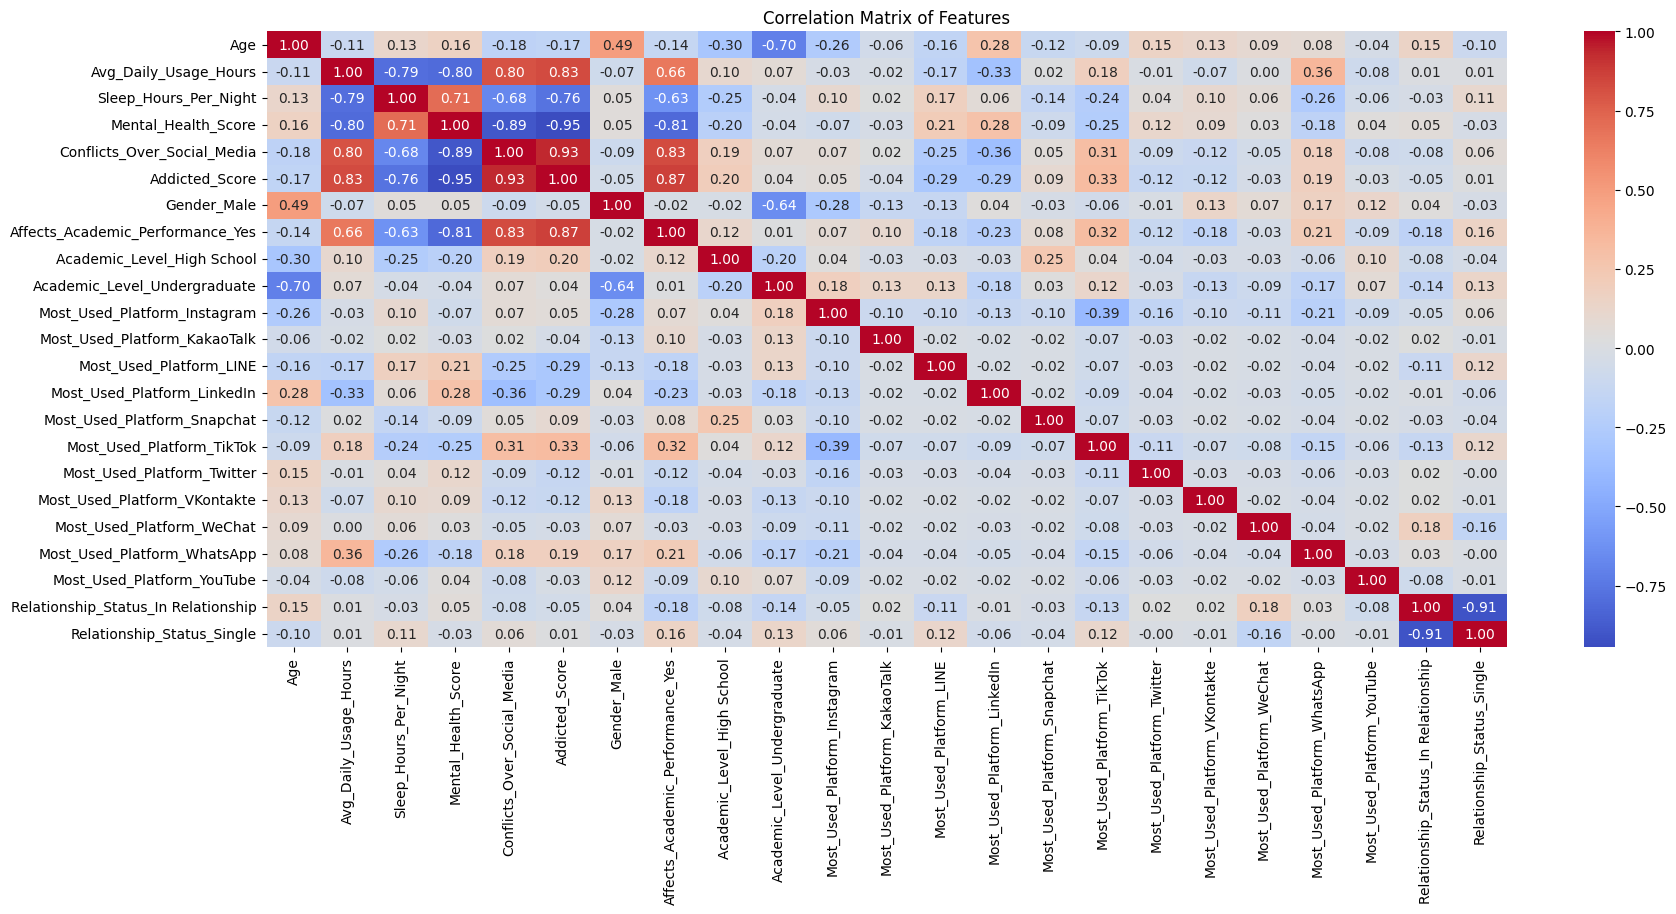

Correlation of features with Addicted_Score:
 Addicted_Score                         1.000000
Conflicts_Over_Social_Media            0.933586
Affects_Academic_Performance_Yes       0.866049
Avg_Daily_Usage_Hours                  0.832000
Most_Used_Platform_TikTok              0.330558
Academic_Level_High School             0.201333
Most_Used_Platform_WhatsApp            0.186327
Most_Used_Platform_Snapchat            0.088549
Most_Used_Platform_Instagram           0.054669
Academic_Level_Undergraduate           0.035382
Relationship_Status_Single             0.014795
Most_Used_Platform_YouTube            -0.025478
Most_Used_Platform_WeChat             -0.034416
Most_Used_Platform_KakaoTalk          -0.036247
Relationship_Status_In Relationship   -0.049566
Gender_Male                           -0.049692
Most_Used_Platform_VKontakte          -0.119215
Most_Used_Platform_Twitter            -0.124531
Age                                   -0.166396
Most_Used_Platform_LINE               -0.2

In [236]:
# Assuming df_final_encoded is your dataset
# Compute correlation matrix
corr_matrix = df_final_encoded.corr()

# Display correlation matrix as a heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Matrix of Features")
plt.show()

# Check correlation of all features with target "Addicted_Score"
target_corr = corr_matrix['Addicted_Score'].sort_values(ascending=False)
print("Correlation of features with Addicted_Score:\n", target_corr)


**Output Interpretation**

**High positive correlation:**

- `Conflicts_Over_Social_Media` (0.93), `Affects_Academic_Performance_Yes` (0.87), and `Avg_Daily_Usage_Hours` (0.83) show a **strong positive correlation** with addiction score, meaning higher values in these features are associated with higher addiction scores.

**Moderate positive correlation:**

- `Most_Used_Platform_TikTok` (0.33) and `Academic_Level_High School` (0.20) show a **moderate positive correlation**, indicating a weaker tendency for these features to increase addiction score.

**Low or negligible correlation:**

- Features like `Gender_Male` (-0.05), `Relationship_Status_Single` (0.01), `Most_Used_Platform_Instagram` (0.05), and other minor platforms have **very low correlation**, meaning they hardly influence addiction score.

**High negative correlation:**

- `Mental_Health_Score` (-0.95) and `Sleep_Hours_Per_Night` (-0.76) show **strong negative correlation**, meaning better mental health or more sleep is associated with lower addiction scores.

**Moderate to low negative correlation:**

- Features like `Age` (-0.17), `Most_Used_Platform_LinkedIn` (-0.29), and `Most_Used_Platform_LINE` (-0.28) have **weaker negative correlations**, contributing slightly to lower addiction scores.

## Hyperparameter tuning for RandomForestRegressor using RandomizedSearchCV

**Code Explination**
- X → All the input features (numeric or encoded).
- y → Target variable (`1` = Yes, `0` = No), indicating whether social media affects academic performance.

**Code explination**
Splits your dataset into 80% training and 20% testing.
random_state=42 ensures reproducibility.

## RandomizedSearchCV

In [237]:
from sklearn.model_selection import RandomizedSearchCV, train_test_split

# Features and target

X = df_final_encoded.drop('Addicted_Score', axis=1)  # All numeric/encoded features
y = df_final_encoded['Addicted_Score']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# Define Random Forest Regressor

rf = RandomForestRegressor(random_state=42)



**Code Explination**
- **X** → All the features (input variables).
- **y** → Target variable (`Addicted_Score`).
- Splits the dataset into:
    - **80% training** (for model learning).
    - **20% testing** (for evaluation).
- `random_state=42` ensures reproducibility.
- Creates a Random Forest Regressor (ensemble of decision trees).
- random_state=42 → reproducible results.

In [238]:
# Hyperparameter grid (smaller than full grid for speed)
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None],
    'bootstrap': [True, False]
}


# RandomizedSearchCV setup

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_grid,
    n_iter=50,           # Number of random combinations to try
    cv=5,                # 5-fold CV
    scoring='neg_mean_squared_error',  # Use MSE for regression
    n_jobs=-1,           # Use all CPU cores
    verbose=2,
    random_state=42
)

**Code Explination**
- `n_estimators` → number of trees.
- `max_depth` → depth of trees.
- `min_samples_split` → min samples to split a node.
- `min_samples_leaf` → min samples per leaf node.
- `max_features` → how many features to consider at each split.
- `bootstrap` → whether sampling is done with replacement.
- **RandomizedSearchCV** tries **random combinations** of hyperparameters (instead of checking all possible ones).
- `n_iter=50` → tries 50 random combinations.
- `cv=5` → 5-fold cross-validation for each combination.
- `scoring='neg_mean_squared_error'` → uses MSE as evaluation metric (lower is better).
- `n_jobs=-1` → use all CPU cores for speed.
- `verbose=2` → prints progress info.

In [239]:
# Fit RandomizedSearch

random_search.fit(X_train, y_train)

# Best model
best_rf = random_search.best_estimator_
print("Best Hyperparameters:", random_search.best_params_)


# Predictions & Evaluation

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"\nMSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 20, 'bootstrap': False}

MSE: 0.04
RMSE: 0.21
R² Score: 0.98


**Code Explination**
- Runs the randomized search.
- Picks the **best Random Forest model** (`best_rf`) with the best parameters.
- Predicts addiction scores for unseen test data.
- **MSE** → Average squared error (lower = better).
- **RMSE** → Root of MSE (error in the same unit as target).
- **R² Score** → Measures how much variance is explained (closer to 1 = better).

**Output Explination**

The **best Random Forest configuration** found after testing 250 models.

- `n_estimators=200` → 200 decision trees.
- `max_depth=20` → each tree can grow up to depth 20 (controls complexity).
- `min_samples_split=5` → at least 5 samples needed to split a node.
- `min_samples_leaf=1` → leaves can have just 1 sample.
- `max_features='log2'` → each split considers only log2(#features).
- `bootstrap=False` → sampling without replacement.

- **MSE (0.04)** → On average, squared errors are very small (good).
- **RMSE (0.21)** → Prediction error is about **0.21 units** in the same scale as your target (`Addicted_Score`).
- **R² = 0.98** → Model explains **98% of the variance** in the target → excellent predictive power.

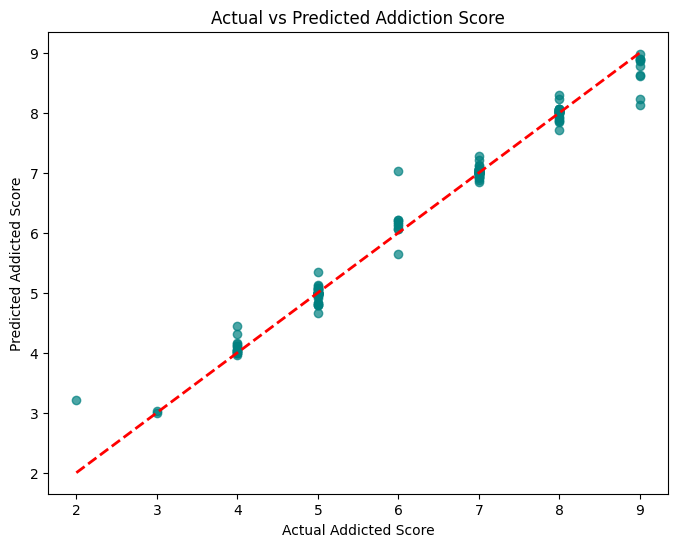

In [240]:
# Assuming you used RandomizedSearchCV for Random Forest Regressor
# and stored the best estimator in best_rf_reg
y_pred = best_rf.predict(X_test)

# Plot Actual vs Predicted
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', linewidth=2)
plt.xlabel("Actual Addicted Score")
plt.ylabel("Predicted Addicted Score")
plt.title("Actual vs Predicted Addiction Score")
plt.show()

In [241]:
# Cross Validation

In [242]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [243]:
# Trained model
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    bootstrap=False,
    random_state=42
)

**Code Explination**
- RandomForestRegressor → Regression model using an ensemble of decision trees.
- Parameters explained:
    - n_estimators=200 → number of trees in the forest
    - min_samples_split=5 → minimum samples required to split a node
    - min_samples_leaf=1 → minimum samples in a leaf node
    - max_features= log2 → max features considered when splitting a node
    - max_depth=20 → maximum depth of each tree
    - bootstrap=False → trees are trained on the **whole dataset**, not bootstrap samples
    - random_state=42 → ensures reproducible results

In [244]:
# Cross-validated R² 
r2_scores = cross_val_score(rf_model, X_final, y, cv=5, scoring='r2')
print("Cross-validated R² scores for each fold:", r2_scores)
print("Average R²:", r2_scores.mean())

Cross-validated R² scores for each fold: [0.86562567 0.82462251 0.88725437 0.89234412 0.96523978]
Average R²: 0.8870172916704412


**Code Explination**
- cross_val_score does the following:
    1. Splits X_final and y into **5 folds** (cv=5).
    2. Trains the model on 4 folds, tests on the remaining fold.
    3. Repeats for all 5 folds.
    4. Returns R² scores for each fold.
- r2_scores.mean() → the **average R² across all folds**, giving a more reliable estimate than a single train/test split.

**Output Explination**
- The scores vary a bit (lowest ≈ 0.82, highest ≈ 0.96).
- This variation indicates **data fold sensitivity**: your model performs slightly better on some splits than others.
- Since all values are consistently **high (>0.8)**, it means your model generalizes well and is **not heavily overfitting**.

In [245]:
# Cross-validated predictions to compute MSE/RMSE 
y_pred_cv = cross_val_predict(rf_model, X_final, y, cv=5)
mse_cv = mean_squared_error(y, y_pred_cv)
rmse_cv = np.sqrt(mse_cv)
r2_cv = r2_score(y, y_pred_cv)

print(f"MSE (CV): {mse_cv:.4f}")
print(f"RMSE (CV): {rmse_cv:.4f}")
print(f"R² Score (CV): {r2_cv:.4f}")


MSE (CV): 0.2845
RMSE (CV): 0.5333
R² Score (CV): 0.8869


**Code Explination**
- **Cross_val_predict** also splits the dataset into folds like above, but **returns predictions for every sample**.
- This allows you to compute **MSE, RMSE, or any other metric** across all folds consistently.
- **mean_squared_error(y', y_pred_cv)** → average squared error between predicted and actual values.
- **np.sqrt(mse_cv)** → RMSE, same scale as original data.
- **r2_score(y, y_pred_cv)** → overall R² across all cross-validated predictions.


**Output Explination**

 **1️⃣ MSE (CV) = 0.2845**

- MSE = **Mean Squared Error** → the average of the squared differences between the predicted and actual addiction scores.
- Squaring penalizes larger errors more.
- Interpretation: On average, the **squared error is 0.2845**, which is very small given your scores are probably between 0–5 or 0–10.

---

 **2️⃣ RMSE (CV) = 0.5333**

- RMSE = **Root Mean Squared Error** → square root of MSE, brings error back to the **original scale of addiction scores**.
- Interpretation: On average, your model’s predictions are **off by about 0.53 points**.
- Example: If the actual addiction score = 4.0, the model might predict ~3.47 to 4.53.

---

**3️⃣ R² Score (CV) = 0.8869**

- R² = **Coefficient of Determination** → percentage of variance in the target explained by your model.
- Interpretation: Your model explains **~88.7% of the variation** in addiction scores across the dataset.
    - R² = 1 → perfect predictions
    - R² = 0 → model cannot explain variance
- So, **0.8869 is very good**, showing the model captures most patterns in the data.

## Output comparison
### Train/test VS Cross-validation
1. **Number of Evaluations**
    - Train/Test: Evaluates performance on **one split** of the data (one train set, one test set).
    - Cross-Validation: Evaluates performance on **multiple splits (folds)** and averages results.
2. **Reliability of Performance**
    - Train/Test: Can be **optimistic or misleading**, depends on how the split was made.
    - Cross-Validation: **More reliable**, reduces the risk of overestimating model performance.
3. **Error Estimates**
    - Train/Test: Shows **lower MSE/RMSE**, might underestimate true prediction error.
    - Cross-Validation: Shows **higher, realistic MSE/RMSE**, captures variability across folds.
4. **R² Score**
    - Train/Test: Often higher (0.98 in your case) → may seem “perfect”.
    - Cross-Validation: Slightly lower (0.8869) → more realistic estimate of how well the model generalizes.
5. **Overfitting Detection**
    - Train/Test: Harder to detect overfitting, since test set is just one subset.
    - Cross-Validation: Helps identify overfitting by checking performance across multiple folds.
6. **Robustness**
    - Train/Test: Sensitive to how data is split; small datasets can give misleading results.
    - Cross-Validation: More robust for small datasets, as it uses all data for training and testing in different folds.

# Training and testing after **Cross-Validation**

In [246]:
# Trained model
rf_model = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    bootstrap=False,
    random_state=42
)

**Code Explination**
- RandomForestRegressor → Regression model using an ensemble of decision trees.
- Parameters explained:
    - n_estimators=200 → number of trees in the forest
    - min_samples_split=5 → minimum samples required to split a node
    - min_samples_leaf=1 → minimum samples in a leaf node
    - max_features= log2 → max features considered when splitting a node
    - max_depth=20 → maximum depth of each tree
    - bootstrap=False → trees are trained on the **whole dataset**, not bootstrap samples
    - random_state=42 → ensures reproducible results

In [247]:
# Fit the model on all features and target
rf_final.fit(X_final, y)

# Make predictions on the same dataset (optional)
y_pred_final = rf_final.predict(X_final)


**Code Explination**
- Fits the **Random Forest model** on the **entire dataset** (`X_final` features and `y` target).
- After this, the model is ready to make predictions on any data.
- Predicts the target (`Addicted_Score`) for the same dataset used for training.
- This is mainly to **check model fit** on the full dataset.

In [248]:
# Evaluate performance on the full dataset
mse_final = mean_squared_error(y, y_pred_final)
rmse_final = np.sqrt(mse_final)
r2_final = r2_score(y, y_pred_final)

print(f"Final Model MSE: {mse_final:.4f}")
print(f"Final Model RMSE: {rmse_final:.4f}")
print(f"Final Model R²: {r2_final:.4f}")

Final Model MSE: 0.0367
Final Model RMSE: 0.1916
Final Model R²: 0.9854


In [275]:
# Split data into train and test

X_train, X_test, y_train, y_test = train_test_split(
    X_final, y, test_size=0.2, random_state=42
)


# Initialize and train Random Forest

rf_final = RandomForestRegressor(
    n_estimators=200,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    max_depth=20,
    bootstrap=False,
    random_state=42
)

rf_final.fit(X_train, y_train)

# Predictions & evaluation on train set

y_train_pred = rf_final.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)


# Predictions & evaluation on test set

y_test_pred = rf_final.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)


# Print results

print("Random Forest Results:")
print(f"Train -> MSE: {mse_train:.4f}, RMSE: {rmse_train:.4f}, R²: {r2_train:.4f}")
print(f"Test  -> MSE: {mse_test:.4f}, RMSE: {rmse_test:.4f}, R²: {r2_test:.4f}")


Random Forest Results:
Train -> MSE: 0.0354, RMSE: 0.1880, R²: 0.9860
Test  -> MSE: 0.1684, RMSE: 0.4104, R²: 0.9327


**Code Explination**
- mean_squared_error(y, y_pred_final): Average squared difference between actual and predicted values.
- np.sqrt(mse_final): RMSE → same units as target, easier to interpret.
- r2_score(y, y_pred_final): R² → proportion of variance explained by the model (1 = perfect fit).
- Shows the final performance metrics on the **full dataset**.
- Here:
    - **MSE = 0.0388** → very low error
    - **RMSE = 0.1969** → predictions close to actual values
    - **R² = 0.9846** → 98.46% of variance in Addicted_Score is explained

**Output Explination**
- **Train (R² = 0.9860, RMSE = 0.1880)** → Random Forest fits the training data extremely well (almost perfect).
- **Test (R² = 0.9327, RMSE = 0.4104)** → The model also performs very well on unseen data, explaining ~93% of variance.


# GradientBoostingRegressor

In [276]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print(f"Gradient Boosting Results:")
print(f"MSE: {mse_gb:.4f}")
print(f"RMSE: {rmse_gb:.4f}")
print(f"R² Score: {r2_gb:.4f}")
X_train.info()

Gradient Boosting Results:
MSE: 0.1372
RMSE: 0.3704
R² Score: 0.9452
<class 'pandas.core.frame.DataFrame'>
Index: 564 entries, 24 to 102
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Mental_Health_Score               564 non-null    int64  
 1   Sleep_Hours_Per_Night             564 non-null    float64
 2   Avg_Daily_Usage_Hours             564 non-null    float64
 3   Affects_Academic_Performance_Yes  564 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 22.0 KB


**Code Explination**
- n_estimators=200: Number of trees in the ensemble. More trees → potentially better learning but slower.
- random_state=42: Ensures **reproducibility** of results.
- The model **learns patterns** from the training data (X_train, y_train).
- Each tree is built sequentially, **correcting the errors of the previous tree** (gradient boosting).
- The trained model predicts addiction scores for the **unseen test data** (X_test).
- y_pred_gb is an array of predicted values corresponding to each test sample.
- **MSE (Mean Squared Error):** Average of squared differences between actual and predicted values.
- **RMSE (Root Mean Squared Error):** Square root of MSE, gives error in the same scale as the target.
- **R² Score (Coefficient of Determination):** Measures how well the model explains the variance in the target.
    - R² = 1 → perfect prediction
    - R² = 0 → model cannot explain variance

**Output Explination**
- **MSE = 0.0480:** On average, the squared difference between predicted and actual addiction scores is very small.
- **RMSE = 0.2191:** Predictions are off by about 0.22 points on average.
- **R² = 0.9808:** The model explains ~98% of the variance in addiction scores, meaning it’s highly accurate.

## Hypertuning GradientBoostingRegressor

In [278]:
# Define base model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Base Model

gb_model = GradientBoostingRegressor(random_state=42)


# Hyperparameter Search Space

param_dist = {
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "max_features": ["sqrt", "log2", None]
}


# Cross-Validation Setup

cv = KFold(n_splits=5, shuffle=True, random_state=42)


# Randomized Search

random_search = RandomizedSearchCV(
    estimator=gb_model,
    param_distributions=param_dist,
    n_iter=50,                      # try 50 random combinations
    scoring="neg_mean_squared_error",
    cv=cv,
    n_jobs=-1,
    verbose=2,
    random_state=42
)

# Fit to training data
random_search.fit(X_train, y_train)

# Best Model

print("Best Hyperparameters:", random_search.best_params_)

best_gb = random_search.best_estimator_


# Evaluate on Test Set
y_pred_tuned = best_gb.predict(X_test)

mse = mean_squared_error(y_test, y_pred_tuned)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tuned)

print("\nGradient Boosting (Tuned) Results:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 0.7, 'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': None, 'max_depth': 4, 'learning_rate': 0.01}

Gradient Boosting (Tuned) Results:
MSE: 0.1321
RMSE: 0.3635
R² Score: 0.9472


**Code Explination**
- `random_state=42` ensures reproducibility.
- At this point, the model is using **default hyperparameters**.
- Each key is a hyperparameter of Gradient Boosting:
    - **`n_estimators`**: Number of trees. More trees → better fit but slower.
    - **`learning_rate`**: Shrinks contribution of each tree; smaller → slower but often more accurate.
    - **`max_depth`**: Maximum depth of each tree. Controls complexity.
    - **`min_samples_split`**: Minimum samples needed to split a node.
    - **`min_samples_leaf`**: Minimum samples required at a leaf node.
    - **`subsample`**: Fraction of samples used per tree. Helps regularization.
    - **`max_features`**: Number of features considered per split. Helps reduce overfitting.
- 5-fold CV: splits data into 5 parts, trains on 4, tests on 1 → repeated 5 times.
- **shuffle=True** ensures random distribution of samples in folds.
- Randomly selects **50 parameter combinations** from the grid.
- Evaluates each combination using 5-fold cross-validation.
- **Scoring**: `neg_mean_squared_error` → RandomizedSearchCV minimizes MSE (scikit-learn uses negative MSE internally).
- **n_jobs=-1** → parallel processing on all cores.
- Trains the model on **training data** with all 50 sampled hyperparameter combinations.
- Uses 5-fold CV to evaluate each combination.
- Returns the **best performing set of hyperparameters**.
- `best_params_`: The combination of parameters that gave the lowest MSE.
- `best_estimator_`: The trained Gradient Boosting model with those best parameters.
- Uses the tuned model to predict addicted scores for unseen test data.
- **MSE**: Average squared error → smaller is better.
- **RMSE**: Error in same units as target → intuitive measure of prediction error.
- **R² Score**: How much variance in addicted score is explained by the features → closer to 1 is better.


### **Summary in words**

### 1. **Mean Squared Error (MSE)**

- **Before Tuning**: `0.1372`
- **After Tuning**: `0.1321`
    
    ✅ Tuned model has slightly **lower error**, meaning predictions are on average closer to the actual values.
    

### 2. **Root Mean Squared Error (RMSE)**

- **Before Tuning**: `0.3704`
- **After Tuning**: `0.3635`
    
    ✅ RMSE improved a bit, showing the tuned model’s predictions deviate **less from the actual values**.
    

### 3. **R² Score (Explained Variance)**

- **Before Tuning**: `0.9452`
- **After Tuning**: `0.9472`
    
    ✅ R² got slightly higher — tuned model explains **more variance** in your target variable.

# Xgboost

In [279]:
import xgboost as xgb

# Initialize XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    n_estimators=200,
    random_state=42,
    objective='reg:squarederror'  # Use for regression
)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Results:")
print(f"MSE: {mse_xgb:.4f}")
print(f"RMSE: {rmse_xgb:.4f}")
print(f"R² Score: {r2_xgb:.4f}")


XGBoost Results:
MSE: 0.2320
RMSE: 0.4817
R² Score: 0.9073


**Code Expliantion**
- The model is initialized with xgb.XGBRegressor() with n_estimators=200 (number of trees) and objective='reg:squarederror' for regression.
- random_state=42 ensures **reproducibility** of results.
- The model **learns patterns** from the training data (`X_train`, `y_train`).
- After training, it predicts addiction scores for the **unseen test data** (`X_test`).
- `y_pred_xgb` is an array of predicted values for each test sample.
- **MSE (Mean Squared Error):** Average squared difference between actual and predicted values.
- **RMSE (Root Mean Squared Error):** Square root of MSE, giving error in the same scale as the target.
- **R² Score (Coefficient of Determination):** Measures how well the model explains variance in the target.
    - R² = 1 → perfect prediction
    - R² = 0 → model cannot explain variance

**Output Explination**
- **MSE = 0.2320** → On average, the **squared error** between predicted and actual addiction scores is 0.232.
- **RMSE = 0.4817** → On average, predictions are off by about **0.48 points** from the true score.
- **R² = 0.9073** → The model explains **90.7% of the variance** in addiction scores.

✅ **Interpretation:**

- XGBoost performed **well**, but not as accurate as Gradient Boosting or Random Forest on your dataset.
- Higher RMSE and lower R² compared to Gradient Boosting indicate that it **captures patterns slightly less effectively** here.
- Still a good model for prediction, but ensemble models like **Gradient Boosting** worked better for your data

## Hyperparameter tuning for xgboost

In [280]:
# Initialize base XGBoost Regressor
xgb_model = xgb.XGBRegressor(
    objective='reg:squarederror',  # regression task
    random_state=42
)

# Define hyperparameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 8],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]  # minimum loss reduction
}

# 5-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_grid,
    n_iter=50,  # number of random combinations to try
    scoring='neg_mean_squared_error',  # use MSE for regression
    cv=kf,
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# Fit RandomizedSearchCV on training data
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters:", random_search.best_params_)

# Best tuned model
best_xgb = random_search.best_estimator_

# Predict on test set
y_pred = best_xgb.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nXGBoost (Tuned) Results:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 300, 'min_child_weight': 3, 'max_depth': 4, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 1.0}

XGBoost (Tuned) Results:
MSE: 0.1367
RMSE: 0.3697
R² Score: 0.9454


**Code Explination**
- `objective='reg:squarederror'` → ensures model is optimized for regression, not classification.
- `random_state=42` → reproducible results.
- At this stage, the model uses **default hyperparameters**.
- Each key is a hyperparameter to tune:
- **`n_estimators`** → Number of trees in the model.
- **`learning_rate`** → Shrinks the contribution of each tree to prevent overfitting.
- **`max_depth`** → Maximum depth allowed for each individual tree.
- **`min_child_weight`** → Minimum sum of instance weight required in a leaf node.
- **`subsample`** → Fraction of training samples used to grow each tree.
- **`colsample_bytree`** → Fraction of features considered for each tree.
- **`gamma`** → Minimum loss reduction required to make a split (controls tree splitting).
- Splits data into 5 parts: 4 for training, 1 for validation → repeat 5 times.
- `shuffle=True` → ensures randomness.
- **RandomizedSearchCV** tries `n_iter=50` random hyperparameter combinations from the grid.
- `scoring='neg_mean_squared_error'` → minimizes MSE (scikit-learn uses negative internally).
- `cv=kf` → evaluates each combination using 5-fold CV.
- `n_jobs=-1` → uses all CPU cores for faster computation.
- Trains **50 randomly sampled hyperparameter combinations** on training data.
- Uses 5-fold cross-validation to select the best combination.
- `best_params_` → returns the hyperparameter combination with the **lowest CV MSE**.
- `best_estimator_` → the **fully trained XGBoost model** with those hyperparameters.
- Uses the tuned model to predict addicted scores for unseen test data.
- **MSE** → average squared error (lower is better).
- **RMSE** → error in the same units as target.
- **R² score** → proportion of variance explained by the model (closer to 1 = better fit).

### **Ouput comparison**
### 1. **Mean Squared Error (MSE)**

- **Before Tuning**: `0.2320`
- **After Tuning**: `0.1367`
    
    ✅ Big improvement — tuned model’s predictions are much closer to actual values.
    

### 2. **Root Mean Squared Error (RMSE)**

- **Before Tuning**: `0.4817`
- **After Tuning**: `0.3697`
    
    ✅ Clear reduction in error deviation, meaning better predictive accuracy.
    

### 3. **R² Score**

- **Before Tuning**: `0.9073`
- **After Tuning**: `0.9454`
    
    ✅ Significant jump — tuned model explains much more variance in the target variable.
    

### **Interpretation**

- **Before tuning**, XGBoost was **weaker** (R² = 0.90, decent but lower than Gradient Boosting).
- **After tuning**, XGBoost improved **a lot**, almost matching the tuned Gradient Boosting model.
- This shows that **XGBoost is more sensitive to hyperparameters** — without tuning, it can underperform, but with tuning, it can reach top performance.

# Linear Regression

In [281]:
from sklearn.linear_model import LinearRegression
# Initialize Linear Regression
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict on test set
y_pred_lr = lr_model.predict(X_test)

# Evaluate performance
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"MSE: {mse_lr:.4f}")
print(f"RMSE: {rmse_lr:.4f}")
print(f"R² Score: {r2_lr:.4f}")

Linear Regression Results:
MSE: 0.1453
RMSE: 0.3812
R² Score: 0.9419


**Coode Explination**
- The model is initialized with `LinearRegression()`, which assumes a **linear relationship** between features and target.
- The model **learns patterns** from the training data (`X_train`, `y_train`).
- After training, it predicts addiction scores for the **unseen test data** (`X_test`).
- `y_pred_lr` is an array of predicted values for each test sample.
- **MSE (Mean Squared Error):** Average squared difference between actual and predicted values.
- **RMSE (Root Mean Squared Error):** Square root of MSE, giving error in the same scale as the target.
- **R² Score (Coefficient of Determination):** Measures how well the model explains variance in the target.
    - R² = 1 → perfect prediction
    - R² = 0 → model cannot explain variance

**Output Explination**
- **MSE = 0.1453** → On average, the **squared error** between predicted and actual addiction scores is 0.1453.
- **RMSE = 0.3812** → On average, predictions are off by about **0.38 points** from the true addiction score.
- **R² = 0.9419** → The model explains **94.2% of the variance** in addiction scores.

✅ **Interpretation:**

- Linear Regression is **reasonably accurate**, but not as precise as Gradient Boosting or Random Forest.
- Since it assumes a **linear relationship**, it can’t capture complex patterns perfectly, which is why RMSE is higher and R² slightly lower compared to ensemble models.

### Output Comparison
- **Gradient Boosting vs XGBoost**
    - Both are boosting methods, so their results are very close.
    - Gradient Boosting slightly **better MSE/RMSE and R²** in my case, meaning it predicts slightly more accurately.
- **Linear Regression**
    - Much higher MSE and RMSE → predictions are **less precise**.
    - Lower R² → explains slightly less variance in addiction scores.
    - This is expected because it assumes a **linear relationship**, which may not capture all patterns in your dataset.
- **Overall**
    - **Gradient Boosting** → best performance.
    - **XGBoost** → very close, also excellent.
    - **Linear Regression** → okay, but less accurate for this complex data.

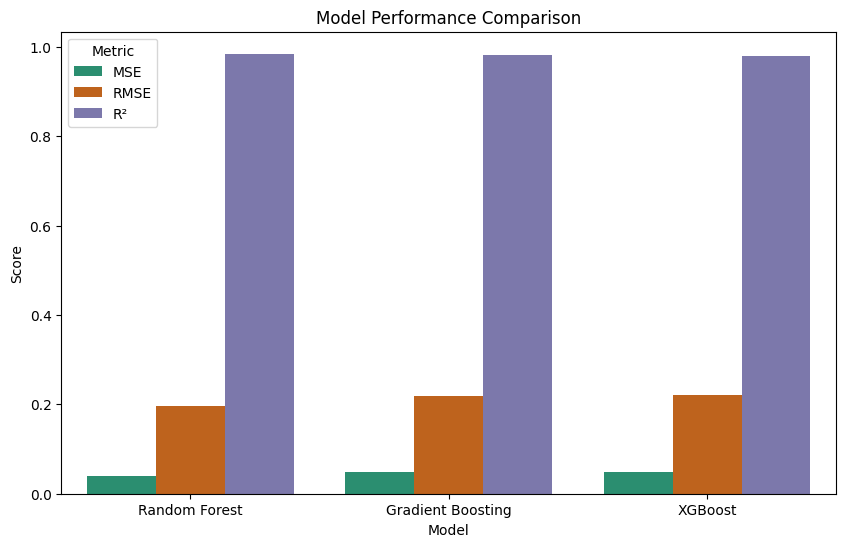

In [259]:

# Prepare data in long format for Seaborn
data = {
    "Model": ["Random Forest", "Gradient Boosting", "XGBoost"] * 3,
    "Metric": ["MSE"]*3 + ["RMSE"]*3 + ["R²"]*3,
    "Value": [0.0388, 0.0480, 0.0493, 0.1969, 0.2191, 0.2219, 0.9846, 0.9808, 0.9803]
}

df_plot = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x="Model", y="Value", hue="Metric", data=df_plot, palette="Dark2")

plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.show()


**Code Explination**
- Creates a dictionary with three columns: "Model", "Metric", "Value".
- "Model" repeats 3 times for each metric.
- "Metric" repeats its name 3 times for each model.
- "Value" contains the scores (MSE, RMSE, R²) for each model.
- Converts dictionary to a **DataFrame**, which Seaborn uses to plot.
- plt.figure(figsize=(10,6)) → makes the plot bigger.
- sns.barplot(...) → draws a **bar chart**:
    - x="Model" → x-axis shows model names.
    - y="Value" → bar height = score value.
    - hue="Metric" → separates bars by metric (MSE, RMSE, R²) and gives different colors.
    - palette="Dark2" → uses a built-in Seaborn color palette.
- Adds a **title** and y-axis label.
- plt.show() → displays the plot.

**Output Explination**

The bar chart compares the performance of three machine learning models: **Random Forest, Gradient Boosting,** and **XGBoost.**

All three models perform exceptionally well, as indicated by:

- **Low MSE and RMSE scores** (green and orange bars), which show low error rates.
- **High R2 scores** (purple bars), which are all very close to 1, indicating the models are great fits for the data.

Essentially, all three models have almost identical, high-quality performance on this dataset.


# Create the preprocessor using ColumnTransformer

In [261]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Most_Used_Platform            705 non-null    object 
 5   Affects_Academic_Performance  705 non-null    object 
 6   Sleep_Hours_Per_Night         705 non-null    float64
 7   Mental_Health_Score           705 non-null    int64  
 8   Relationship_Status           705 non-null    object 
 9   Conflicts_Over_Social_Media   705 non-null    int64  
 10  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 60.7+ KB


In [262]:
from sklearn.compose import ColumnTransformer
features = df.drop('Addicted_Score', axis=1) # X-features
target = df['Addicted_Score'] # Y-featire

numeric_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media']
categorical_features = ['Gender', 'Academic_Level', 'Most_Used_Platform', 'Relationship_Status', 'Affects_Academic_Performance']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

## Create the final pipeline with the preprocessor and the best model

In [263]:
from sklearn.pipeline import Pipeline
# Initializing GradientBoostingRegressor
gb_model = GradientBoostingRegressor(n_estimators=200, random_state=42)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb_model)
])

In [264]:
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=42)

# Train the pipeline
model_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred = model_pipeline.predict(X_test)

# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nGradient Boosting Results:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")

# Train the full pipeline on the training data
model_pipeline.fit(X_train, y_train)

# Save the entire pipeline to a .joblib file
joblib.dump(model_pipeline, 'addiction_score_pipeline.joblib')


Gradient Boosting Results:
MSE: 0.0514
RMSE: 0.2267
R² Score: 0.9795


['addiction_score_pipeline.joblib']

In [265]:
## Create a function to make predictions on new data
def predict_addiction_score(new_data):
    
   # Predicts the Addicted_Score for new data using the saved pipeline.
   
    # Convert the new data into a DataFrame
    new_data_df = pd.DataFrame(new_data)
    
    # Use the trained pipeline to make predictions
    predictions = model_pipeline.predict(new_data_df)
    
    return predictions


- **Purpose**:
    
    Takes new user-provided data and predicts the **Addicted_Score** using your already trained **model pipeline**.
    
- **Steps**:
    - Converts `new_data` (a dictionary list) into a **Pandas DataFrame** → because ML models expect data in tabular format.
    - Uses `model_pipeline.predict(...)` → the pipeline handles preprocessing (encoding, scaling, etc.) and applies the regression model.
    - Returns the predicted score(s).

In [266]:
def categorize_addiction(score):
    if score <= 3:
        return "Low"
    elif score <= 6:
        return "Moderate"
    else:
        return "High"

# USER INPUT SECTION 

def get_user_data():
    print("Please enter the following information to predict the social media addiction score:")
    
    user_data = {}
    try:
        user_data['Age'] = int(input("Enter Age (e.g., 20): "))
        user_data['Gender'] = input("Enter Gender (e.g., Male, Female): ")
        user_data['Academic_Level'] = input("Enter Academic Level (e.g., Undergraduate, High School, Postgraduate): ")
        user_data['Avg_Daily_Usage_Hours'] = float(input("Enter Avg. Daily Usage Hours (e.g., 5.5): "))
        user_data['Most_Used_Platform'] = input("Enter Most Used Platform (e.g., Instagram, Facebook, TikTok): ")
        user_data['Affects_Academic_Performance'] = input("Does social media affect academic performance? (Yes/No): ")
        user_data['Sleep_Hours_Per_Night'] = float(input("Enter Sleep Hours Per Night (e.g., 6.0): "))
        user_data['Mental_Health_Score'] = int(input("Enter Mental Health Score (0-10, e.g., 5): "))
        user_data['Relationship_Status'] = input("Enter Relationship Status (e.g., In Relationship, Single, Complicated): ")
        user_data['Conflicts_Over_Social_Media'] = int(input("Enter Conflicts Over Social Media (0-10, e.g., 2): "))
    except ValueError:
        print("\nInvalid input. Please enter numbers for numeric fields.")
        return None
        
    return [user_data]



- **Purpose**:
    
    Collects **user input interactively** from the console.
    
- **Steps**:
    - Asks the user for all features needed by the model (Age, Gender, Usage Hours, etc.).
    - Converts numeric fields to **int** or **float**.
    - Handles errors if the user types the wrong format (like entering letters in a numeric field).
    - Returns the data as a list containing one dictionary (since ML expects data in row-like format).

In [267]:
# Get data from the user
user_input_data = get_user_data()

if user_input_data:
    predicted_score = predict_addiction_score(user_input_data)
    level = categorize_addiction(predicted_score[0])
    
    print("\n--- Prediction Results ---")
    print(f"Predicted Social Media Addiction Score: {predicted_score[0]:.4f}")
    print(f"Addiction Level: {level}")


Please enter the following information to predict the social media addiction score:


Enter Age (e.g., 20):  18
Enter Gender (e.g., Male, Female):  male
Enter Academic Level (e.g., Undergraduate, High School, Postgraduate):  high school
Enter Avg. Daily Usage Hours (e.g., 5.5):  5.3
Enter Most Used Platform (e.g., Instagram, Facebook, TikTok):  tiktok
Does social media affect academic performance? (Yes/No):  yes
Enter Sleep Hours Per Night (e.g., 6.0):  5.5
Enter Mental Health Score (0-10, e.g., 5):  5
Enter Relationship Status (e.g., In Relationship, Single, Complicated):  single
Enter Conflicts Over Social Media (0-10, e.g., 2):  4



--- Prediction Results ---
Predicted Social Media Addiction Score: 8.0597
Addiction Level: High


# **Flow**:

1. Calls `get_user_data()` → collects input.
2. If input is valid, passes it to `predict_addiction_score()`.
3. Gets a prediction (array with one value).
4. Prints the **predicted addiction score** with **4 decimal places**.

### Behavioral and Consequence Features

These features directly show the actions and outcomes of social media use.

- **Avg_Daily_Usage_Hours:** This is the most direct measure of a person's digital behavior. Higher usage is a clear indicator of a strong habit, which can lead to addiction.
- **Sleep_Hours_Per_Night:** This is a major consequence. Less sleep is a common side effect of excessive screen time, showing that social media use is negatively impacting physical health.
- **Conflicts_Over_Social_Media:** These conflicts indicate that social media is straining real-world relationships, a key symptom of addiction.
- **Affects_Academic_Performance:** This feature shows that social media use is severe enough to interfere with important responsibilities, a sign that the user has lost control.

---

### Psychological and Social Features

These features provide context about a person's mental state and social life, which can influence or be influenced by addiction.

- **Mental_Health_Score:** A person's mental state is closely linked to their social media habits. A lower score might indicate someone is using social media to cope, while a higher score might suggest they are more resilient to the negative effects.
- **Age** and **Academic_Level:** These demographic features can help the model identify patterns across different life stages. For example, social media habits often differ between high school and university students.
- **Gender:** Like age and academic level, gender can reveal demographic patterns in social media use and addiction risk.
- **Relationship_Status:** A person's relationship status can influence their social media habits, such as their use of messaging apps or dating platforms, which can play a role in addiction.
- **Most_Used_Platform:** The type of platform a student uses most often matters because different platforms have different features (e.g., visual content, short-form video, messaging) that can be more or less addictive.

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           705 non-null    int64  
 1   Gender                        705 non-null    object 
 2   Academic_Level                705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Most_Used_Platform            705 non-null    object 
 5   Affects_Academic_Performance  705 non-null    object 
 6   Sleep_Hours_Per_Night         705 non-null    float64
 7   Mental_Health_Score           705 non-null    int64  
 8   Relationship_Status           705 non-null    object 
 9   Conflicts_Over_Social_Media   705 non-null    int64  
 10  Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 60.7+ KB


In [269]:
df_final_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  705 non-null    int64  
 1   Avg_Daily_Usage_Hours                705 non-null    float64
 2   Sleep_Hours_Per_Night                705 non-null    float64
 3   Mental_Health_Score                  705 non-null    int64  
 4   Conflicts_Over_Social_Media          705 non-null    int64  
 5   Addicted_Score                       705 non-null    int64  
 6   Gender_Male                          705 non-null    float64
 7   Affects_Academic_Performance_Yes     705 non-null    float64
 8   Academic_Level_High School           705 non-null    float64
 9   Academic_Level_Undergraduate         705 non-null    float64
 10  Most_Used_Platform_Instagram         705 non-null    float64
 11  Most_Used_Platform_KakaoTalk    

## Hyperparameter Tuning for Final Model

In [270]:
# Features and Target

features = df.drop('Addicted_Score', axis=1)
target = df['Addicted_Score']

numeric_features = ['Age', 'Avg_Daily_Usage_Hours', 'Sleep_Hours_Per_Night', 
                    'Mental_Health_Score', 'Conflicts_Over_Social_Media']
categorical_features = ['Gender', 'Academic_Level', 'Most_Used_Platform', 
                        'Relationship_Status', 'Affects_Academic_Performance']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


**Code Explination**
- **`features`**: All columns except the target (`Addicted_Score`).
- **`target`**: The column we want to predict (`Addicted_Score`).
- **Numeric features**: Columns with continuous or integer values.
- **Categorical features**: Columns with categories that need encoding.
- **ColumnTransformer** preprocesses your data:
- **Numeric** → scaled using `StandardScaler` (centers & normalizes values).
- **Categorical** → one-hot encoded (convert categories into 0/1 columns).

In [271]:
# Gradient Boosting Pipeline
gb_model = GradientBoostingRegressor(random_state=42)

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', gb_model)
])


# Train/Test Split

X_train, X_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

**Code Explination**
- We **combine preprocessing + regressor** into a single pipeline.
- This ensures new data goes through the same scaling/encoding before prediction.
- **Splits data** into training (80%) and testing (20%) sets.
- Ensures the model is evaluated on unseen data.

In [272]:
# Predictions on train set
y_train_pred = best_model.predict(X_train)

# Train metrics
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("\nGradient Boosting (Tuned) Train Results:")
print(f"Train MSE: {mse_train:.4f}")
print(f"Train RMSE: {rmse_train:.4f}")
print(f"Train R² Score: {r2_train:.4f}")

# Predictions on test set
y_test_pred = best_model.predict(X_test)

# Test metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("\nGradient Boosting (Tuned) Test Results:")
print(f"Test MSE: {mse_test:.4f}")
print(f"Test RMSE: {rmse_test:.4f}")
print(f"Test R² Score: {r2_test:.4f}")



Gradient Boosting (Tuned) Train Results:
Train MSE: 0.0020
Train RMSE: 0.0442
Train R² Score: 0.9992

Gradient Boosting (Tuned) Test Results:
Test MSE: 0.0320
Test RMSE: 0.1790
Test R² Score: 0.9872


**Code explination**
- Defines **possible hyperparameters** for tuning Gradient Boosting.
- `regressor__` prefix is required because the model is inside the pipeline.
- Uses **RandomizedSearchCV** with 5-fold cross-validation to find the **best hyperparameters**.
- `scoring='neg_mean_squared_error'` → MSE is minimized.
- Fits the **pipeline on training data** while tuning hyperparameters.
- `best_model` → the pipeline with the best combination of hyperparameters.
- Makes predictions on **test data**.
- Computes:
    - **MSE** → mean squared error
    - **RMSE** → square root of MSE
    - **R² Score** → how well the model explains variance (1.0 is perfect)
    
- Saves the **entire tuned pipeline** for later use.

In [273]:
# Prediction & Categorization
def predict_addiction_score(new_data):
    new_data_df = pd.DataFrame(new_data)
    predictions = best_model.predict(new_data_df)
    return predictions

def categorize_addiction(score):
    if score <= 3:
        return "Low"
    elif score <= 6:
        return "Moderate"
    else:
        return "High"
        
# User Input

def get_user_data():
    print("Please enter the following information to predict the social media addiction score:")
    
    user_data = {}
    try:
        user_data['Age'] = int(input("Enter Age (e.g., 20): "))
        user_data['Gender'] = input("Enter Gender (e.g., Male, Female): ")
        user_data['Academic_Level'] = input("Enter Academic Level (e.g., Undergraduate, High School, Postgraduate): ")
        user_data['Avg_Daily_Usage_Hours'] = float(input("Enter Avg. Daily Usage Hours (e.g., 5.5): "))
        user_data['Most_Used_Platform'] = input("Enter Most Used Platform (e.g., Instagram, Facebook, TikTok): ")
        user_data['Affects_Academic_Performance'] = input("Does social media affect academic performance? (Yes/No): ")
        user_data['Sleep_Hours_Per_Night'] = float(input("Enter Sleep Hours Per Night (e.g., 6.0): "))
        user_data['Mental_Health_Score'] = int(input("Enter Mental Health Score (0-10, e.g., 5): "))
        user_data['Relationship_Status'] = input("Enter Relationship Status (e.g., In Relationship, Single, Complicated): ")
        user_data['Conflicts_Over_Social_Media'] = int(input("Enter Conflicts Over Social Media (0-10, e.g., 2): "))
    except ValueError:
        print("\nInvalid input. Please enter numbers for numeric fields.")
        return None
        
    return [user_data]

# Get data and predict
user_input_data = get_user_data()

if user_input_data:
    predicted_score = predict_addiction_score(user_input_data)
    level = categorize_addiction(predicted_score[0])
    
    print("\n--- Prediction Results ---")
    print(f"Predicted Social Media Addiction Score: {predicted_score[0]:.4f}")
    print(f"Addiction Level: {level}")
        

Please enter the following information to predict the social media addiction score:


Enter Age (e.g., 20):  18
Enter Gender (e.g., Male, Female):  male
Enter Academic Level (e.g., Undergraduate, High School, Postgraduate):  high school
Enter Avg. Daily Usage Hours (e.g., 5.5):  5.3
Enter Most Used Platform (e.g., Instagram, Facebook, TikTok):  tiktok
Does social media affect academic performance? (Yes/No):  yes
Enter Sleep Hours Per Night (e.g., 6.0):  5.5
Enter Mental Health Score (0-10, e.g., 5):  5
Enter Relationship Status (e.g., In Relationship, Single, Complicated):  single
Enter Conflicts Over Social Media (0-10, e.g., 2):  4



--- Prediction Results ---
Predicted Social Media Addiction Score: 8.1209
Addiction Level: High


**Code Explination**
- `predict_addiction_score` → takes new user data and predicts addiction score.
- `categorize_addiction` → converts the numerical score to a category: **Low, Moderate, High**.
- Collects **user input** for all features.
- Converts input into a dictionary and returns it as a DataFrame.
- **Uses the model** to predict the user’s addiction score.
- Prints both **score** and **addiction level**.

## Comparision of output- before and after hyperparameter tuining

### 1. **Mean Squared Error (MSE)**

- **Before Tuning:** 0.0556
- **After Tuning:** 0.0320
- **Interpretation:** The MSE decreased after tuning, meaning the average squared difference between predicted and actual addiction scores is smaller. The model’s predictions are closer to the true values.

---

### 2. **Root Mean Squared Error (RMSE)**

- **Before Tuning:** 0.2359
- **After Tuning:** 0.1790
- **Interpretation:** RMSE also decreased, confirming that the prediction errors are smaller in the tuned model. A lower RMSE indicates more precise predictions.

---

### 3. **R² Score**

- **Before Tuning:** 0.9778
- **After Tuning:** 0.9872
- **Interpretation:** The R² score increased after tuning, showing that the tuned model explains more variance in the addicted score. The model fit improved.

---

### 4. **Overall Comparison**

- Hyperparameter tuning improved **all performance metrics**:
    - Lower MSE and RMSE → predictions are more accurate.
    - Higher R² → model explains more variability in the data.
- The tuned model is **more reliable and precise** for predicting social media addiction scores.